# Exploratory Data Analysis of Video Game Data

In this notebook we will explore the data through visualization, fill any missing values and look into feature that we hypothesised may have corrilation with our game popularity as well as explore what we will define as a "popular" video game.

Below is a synopsis of what we learned in this notebook:

## Hours of Game play: between 16 and 50 hours
The merging of data sets Steam Purchase and Steam Play in part III, shows us that extermely long games have low sales, we determined this cut off was about 50 hours of game play.

In part V, we saw that longer games did have a higher percentage of positive reviews, we determined that games above 16 hours were at least 50% positive.

So we can conclude keeping the game play between 16 and 50 hours will be a safe area


## Popular Genres: Action, Role-Playing, Shooting, Racing, Sports, Platform, Survival, Horror, Simulation, Adventure
In part IV: We trimmed the data to look at only the most popular games by sales and then compared the User and critic scores to the sales with the hue set to Genre, Rating, and then Platform. 

Action - Both User and Critic Scores appear fairly high for these games. Action is a solid choice for Genre

Role-Playing - The User and Critic Scores appear to agree, though slightly lower sales than Action, still a solid option

Shooting - It looks as if Critics like this genre more than users, sales are slightly higher than RP games, but lower than the potential of the Action games

Racing - User and Critics seem to agree on the scores, they are less popular than Action (as far as scores), but have a higher potential for sales. We could hypothesise that this is because Racing games tend to have more co-op options, thus the need for players to have friends who play the game so they can play together.

Sports - Just like Shooting, Critics like these games more than users, and a suprisingly high sales similar to Racing. Do these games tend to have co-op options? 

Platform - There doesn't seem to be many of these in the popular games, however those that are here are scored high and have a decent number of sales. This sounds like a High Risk/High Reward genre.

In part V-ii, we had more genre's to look at, that became more niche. This data set gave us: survival,rpg, action, horror, platform, simulation, and adventure. It is good to see these two data sets agree on popular game genres

## Popular Platform: Current or up-to-date Systems
It doesn't appear as if the critics have a prefrence in Platform, where as it looks like the Useres like the PSP, PS2, and 3DS and appear to dislike the XBox 360 and PS3.


## Rating: Everyone, Teen, Mature
Looking at the Ratings, it appears that making a game with a rating of Everyone or Teen is mroe popular amongs Users and Critics, with Everyone having a higher sales potentions, likely because the rating allows them to reach a younger audience.

It appears that having a Mature rating has higher sales than Teen ratings, however it has the risk of lower user and critic scores.

## Animation: 3D
This category was compareding the large data set in part V-i. We compared 2D, 2.5D, and 3D. 3D tended to have higher ratings as well as higher price for the game.

## Art Style: Visual Novel, Anime, and Pixel Graphics
These 3 art styles were the top performing in the data set in part V

## Game Features: Great Soundtrack, Story Rich, Multiplayer
There were many features we looked at in part V, games that had one of these 3 tags tended to have a higher rate positive ratings, as well as be important for longer games.

## Play Style: Strategy, Open World, Survival
These again were found in part V. These 3 were favored for the game play times we were looking at as well as having high ratings.

## Difficulty: Difficult
In part V, ratings were higher for games that were considered Difficult and they experienced longer game play time.

## Point of View: First or Third
We saw in part V that First and Third person perspectives were favored for longer games

## Setting: Fantasy, Cyber Punk, World War 2, Post Apocalyptic, Warhammer 40k, and War
These settings were favored for longer gameplay and higher ratings in the data set looked at in part V.

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns


import requests
import numpy as np
#import pandas_profiling
#import tkinter
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('tkagg')

# I. Steam Purchase Data

Note: Hours column is all 1's, we're going to use this df to see game popularity by number of steam purchases, and later check if this matches up with data from other data sets.

In [2]:
purchase = pd.read_csv("./csv_files/steam_data_purchase_clean.csv", index_col=0)

In [3]:
purchase.head()

,UserID,Game,Purchase/Play,Hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
2,151603712,Fallout 4,purchase,1.0
4,151603712,Spore,purchase,1.0
6,151603712,Fallout New Vegas,purchase,1.0
8,151603712,Left 4 Dead 2,purchase,1.0


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129511 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UserID         129511 non-null  int64  
 1   Game           129511 non-null  object 
 2   Purchase/Play  129511 non-null  object 
 3   Hours          129511 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [5]:
purchase.describe()

,UserID,Hours
count,1.295110e+05,129511.0
mean,1.024447e+08,1.0
std,7.236442e+07,0.0
min,5.250000e+03,1.0
25%,4.550738e+07,1.0
50%,8.605570e+07,1.0
75%,1.542307e+08,1.0
max,3.099031e+08,1.0


In [6]:
purchase['Game'].value_counts()

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
                                   ... 
Chariot                               1
D4 Dark Dreams Don't Die              1
GamersGoMakers                        1
Dragon's Lair 2 Time Warp             1
Wooden Floor                          1
Name: Game, Length: 5155, dtype: int64

In [7]:
purchase['Game'].value_counts().describe()

count    5155.000000
mean       25.123375
std       101.572586
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      4841.000000
Name: Game, dtype: float64

In [8]:
len(pd.unique(purchase['Game']))

5155

There are 5155 different games listed in this data set with a mean 25 sales and a standard deviation of 102 sales. 

Next I want to look at the distribution of these sales, to see what we can decide on as a good base line for determining if a game is popular or not.

In [9]:

pivoted_purchase = purchase.pivot_table(index='Game', values='Hours', aggfunc='count')
pivoted_purchase

,Hours
Game,
007 Legends,1
0RBITALIS,3
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7
10 Second Ninja,6
"10,000,000",1
...,...
sZone-Online,102
samurai_jazz,1
the static speaks my name,13


In [10]:
pivoted_purchase.describe()

,Hours
count,5155.000000
mean,25.123375
std,101.572586
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,4841.000000


Above confirmed that the pivot that was just done does still give us the same numbers as what we were seeing in the dataframe.

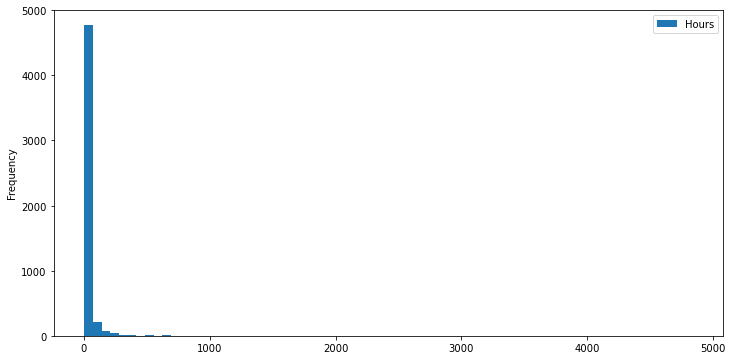

In [11]:
%matplotlib inline
pivoted_purchase.plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

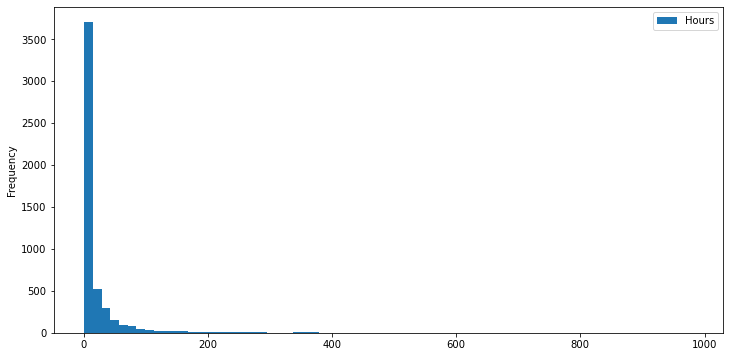

In [12]:
pivoted_purchase[pivoted_purchase['Hours'] < 1000].plot(kind='hist', bins=70, figsize=[12,6])
plt.show()

In [13]:
pivoted_purchase[pivoted_purchase['Hours'] < 400].describe()

,Hours
count,5126.000000
mean,20.102419
std,43.504239
min,1.000000
25%,2.000000
50%,5.000000
75%,17.000000
max,395.000000


Our data appears to be very skewed on sales. I don't believe this data set will be a good determinate for popularity as the analysis suggests that our game could be popular if we reach 17 sales.

# II. Steam Play Data

In this data set we intend to look at the hours each game has been played to see if that would be a better determinate for game popularity

In [14]:
play = pd.read_csv("./csv_files/steam_data_play_clean.csv", index_col=0)
play.head()

,UserID,Game,Purchase/Play,Hours
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [15]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70489 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserID         70489 non-null  int64  
 1   Game           70489 non-null  object 
 2   Purchase/Play  70489 non-null  object 
 3   Hours          70489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [16]:
play.describe()

,UserID,Hours
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


In [17]:
play['Game'].value_counts()

Dota 2                                       4841
Team Fortress 2                              2323
Counter-Strike Global Offensive              1377
Unturned                                     1069
Left 4 Dead 2                                 801
                                             ... 
Alone in the Dark                               1
Quake Mission Pack 1 Scourge of Armagon         1
Planet of the Eyes                              1
Crawl                                           1
Nancy Drew Last Train to Blue Moon Canyon       1
Name: Game, Length: 3600, dtype: int64

In the first application of .describe() we are analyzing each instance of hours playing a game seperately. We can see that this will be fairly skewed just by seeing the mean as 48.9 hours versus the median of 4.5 hours. Next I would like to see if this remains true if we take the average hours played grouped by the game name

In [18]:
play.drop(columns='UserID', inplace=True)
avg_hr_play = play.groupby('Game').mean()
avg_hr_play.head()

,Hours
Game,
007 Legends,0.70
0RBITALIS,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.00
10 Second Ninja,2.95
"10,000,000",3.60


In [19]:
avg_hr_play.describe()

,Hours
count,3600.000000
mean,13.331637
std,39.121551
min,0.100000
25%,1.493651
50%,3.900000
75%,10.758667
max,1295.000000


<AxesSubplot:ylabel='Frequency'>

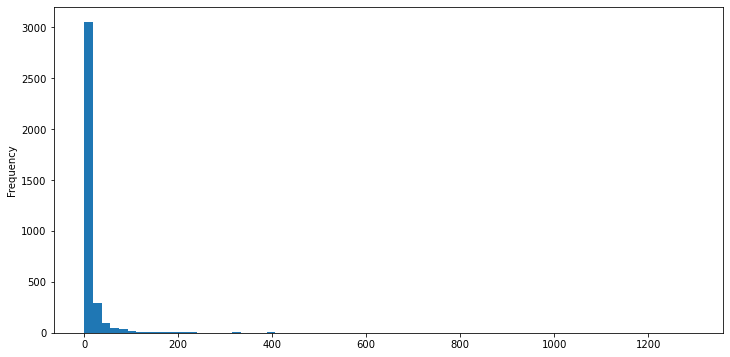

In [20]:
avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [21]:
trim_avg_hr_play = avg_hr_play[avg_hr_play['Hours']<250]

{'whiskers': [<matplotlib.lines.Line2D at 0x14469058340>,
 'caps': [<matplotlib.lines.Line2D at 0x14469058a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1446904afa0>],
 'medians': [<matplotlib.lines.Line2D at 0x14469066100>],
 'fliers': [<matplotlib.lines.Line2D at 0x14469066460>],
 'means': []}

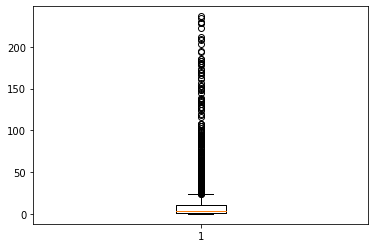

In [22]:
plt.boxplot(trim_avg_hr_play['Hours'])

<AxesSubplot:ylabel='Frequency'>

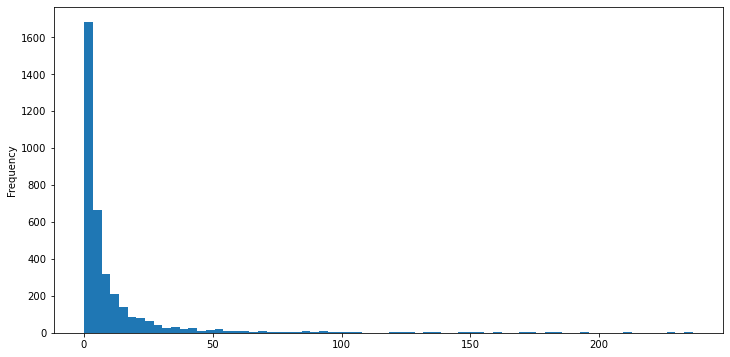

In [23]:
trim_avg_hr_play['Hours'].plot(kind='hist', bins=70, figsize=[12,6])

In [24]:
trim_avg_hr_play.describe()

,Hours
count,3584.000000
mean,11.570922
std,24.323364
min,0.100000
25%,1.455357
50%,3.890000
75%,10.600000
max,236.375176


Looking at these two sets (purchase and play) it's difficult to place a point to determine a video game as "popular", with sales we said we could determine 17 sales the video game was popular since it was more popular than 75% of data, similarly using the 75% cut off, we could say a game is popular with only 10 hours of game play. The 10 Hours isn't as strange as the 17 sales. I am curious to look at the corrilations of these. In theory we should have all the same video games in these two data sets since we seperated them from the same set previously, we have just aggragated the data.

## III. Merging Purchase and Play Data

We plan to merge these two data sets back together to see if there is a corrilation between the sales and the hours of play.

In [25]:
merge_purchase_play = pivoted_purchase.merge(avg_hr_play, how='inner', on='Game')
merge_purchase_play.head()

,Hours_x,Hours_y
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


In [26]:
merge_purchase_play.rename(columns={"Hours_x": "Purchase", "Hours_y": "Hours"}, inplace=True)

In [27]:
merge_purchase_play.corr()

,Purchase,Hours
Purchase,1.000000,0.156211
Hours,0.156211,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

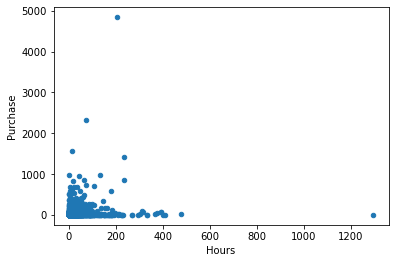

In [28]:
merge_purchase_play.plot.scatter(x='Hours', y='Purchase')

In [29]:
trim_merged = merge_purchase_play[merge_purchase_play['Hours']<500]

trim_merged = trim_merged[trim_merged['Purchase']<1000]

trim_merged.head()

,Purchase,Hours
Game,,
007 Legends,1,0.70
0RBITALIS,3,0.40
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),7,4.00
10 Second Ninja,6,2.95
"10,000,000",1,3.60


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

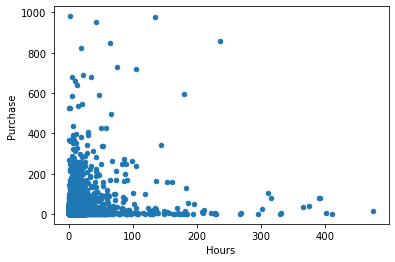

In [30]:
trim_merged.plot.scatter(x='Hours', y='Purchase')

In [31]:
trim_merged.corr()

,Purchase,Hours
Purchase,1.000000,0.154892
Hours,0.154892,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

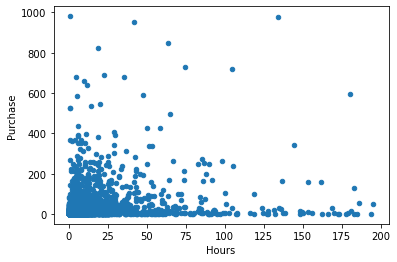

In [32]:
trim_merged[trim_merged['Hours']<200].plot.scatter(x='Hours', y='Purchase')

<AxesSubplot:xlabel='Hours', ylabel='Purchase'>

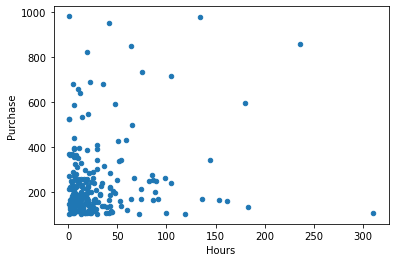

In [33]:
trim_merged[trim_merged['Purchase']>100].plot.scatter(x='Hours', y='Purchase')

Looking at the scatter plot we can conclude that shorter games tend to be more popular, about 50 hours appears to be when the bulk of the games tend to start lowering in sales.

##  IV. Video Game Data 2016 Sales

In [34]:
vg_sales_2016_w_scores = pd.read_csv(r"./csv_files/Video_Games_Sales_as_at_22_Dec_2016.csv")
vg_sales_2016_w_scores.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
vg_sales_2016_w_scores.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [36]:
vg_sales_2016_w_scores.shape

(16719, 16)

Let's drop the rows of missing Name, Genre, and publisher, since these are such a small percentage of the data

In [37]:
vg_sales_2016_w_scores.dropna(subset= ['Name', 'Genre', 'Publisher'], inplace=True)
vg_sales_2016_w_scores.isna().sum()

Name                  0
Platform              0
Year_of_Release     247
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8530
Critic_Count       8530
User_Score         9079
User_Count         9079
Developer          6576
Rating             6720
dtype: int64

In [38]:
vg_sales_2016_w_scores.shape

(16663, 16)

The rows missing the Year_of_Release appears to be about 1.5% of our data. For the sake of this project, we will drop this row as well.

In [39]:
vg_sales_2016_w_scores.dropna(subset= ['Year_of_Release'], inplace=True)
vg_sales_2016_w_scores.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

Now about half our data is missing the scores, Rating, and Developer. I want to see if seperating out these by one of the columns will catch all of the missing values, if so we make look at the scores with out this set. However first I want to analyze the data ignoring the columns with missing values.

In [40]:
sales_no_scores = vg_sales_2016_w_scores.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], inplace=False)
sales_no_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [41]:
vg_sales_2016_w_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [42]:
sales_no_scores.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.092346,0.003922,-0.168614,0.037686,-0.076337
NA_Sales,-0.092346,1.000000,0.766539,0.451175,0.638502,0.941238
EU_Sales,0.003922,0.766539,1.000000,0.435877,0.722679,0.901665
JP_Sales,-0.168614,0.451175,0.435877,1.000000,0.291489,0.613305
Other_Sales,0.037686,0.638502,0.722679,0.291489,1.000000,0.748907
Global_Sales,-0.076337,0.941238,0.901665,0.613305,0.748907,1.000000


The Year_of_Release does not appear to corrilate with sales. I attempted get_dummies, but there appears to be too many categories to do all of the columns at once, so I will be doing them seperately.

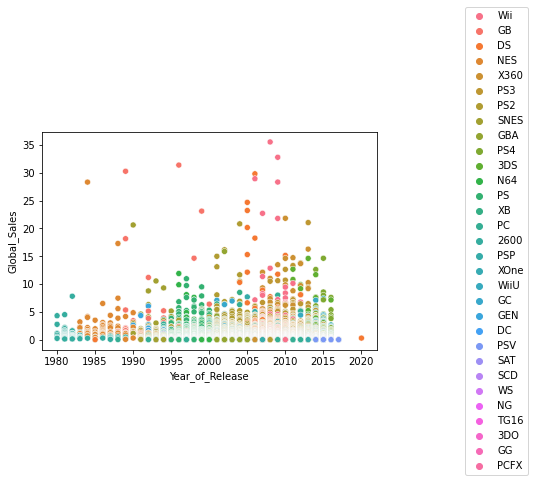

In [43]:
_ = sns.scatterplot(data=sales_no_scores[sales_no_scores['Global_Sales']<40], x='Year_of_Release', y='Global_Sales', hue='Platform')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [44]:
dummy_sales_platform = pd.get_dummies(sales_no_scores, columns=['Platform'])
dummy_sales_platform.shape

(16416, 40)

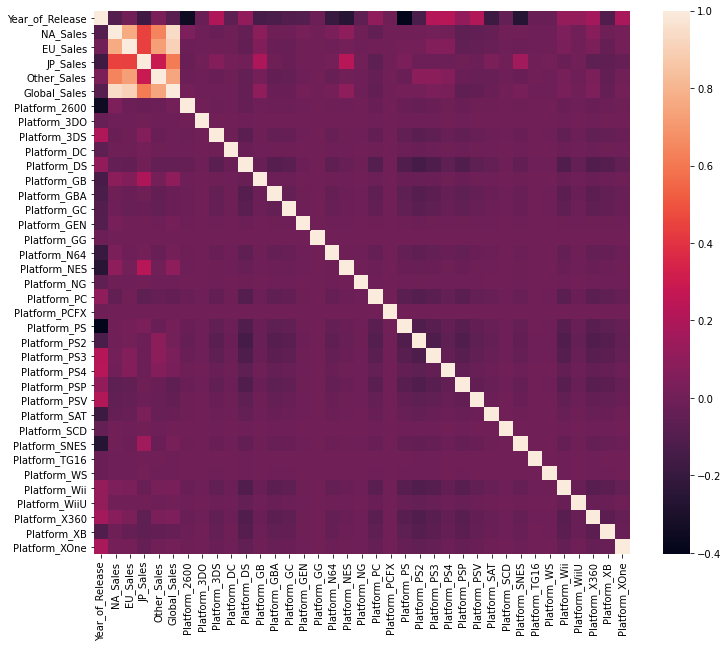

In [45]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_platform.corr());

The platforms appear most corrilated with sales in Japan, and the platforms of note are: SNES (Super Nintendo Entertainment System), NES (Nintendo Entertainment System), and GameBoy. Note however, all three of these are outdated gaming systems that no longer have new game releases, so this isn't as useful to us right now.

The scatter plot is a little bit more informative, in showing that games that are made on/for platforms that are up to date for the time, we can see this developement with the Play Station.

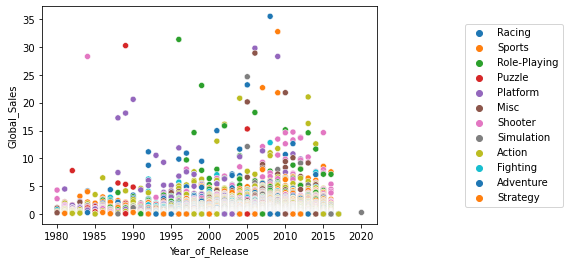

In [46]:
_ = sns.scatterplot(data=sales_no_scores[sales_no_scores['Global_Sales']<40], x='Year_of_Release', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

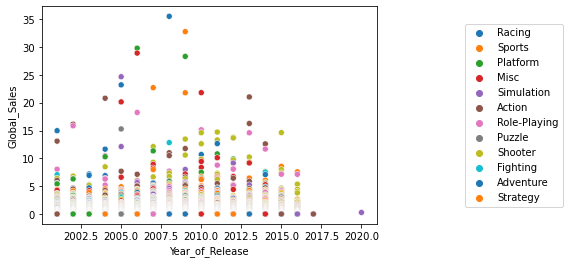

In [47]:
modern = sales_no_scores[sales_no_scores['Year_of_Release']>2000]
_ = sns.scatterplot(data=modern[modern['Global_Sales']<40], x='Year_of_Release', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [48]:
dummy_sales_genre = pd.get_dummies(sales_no_scores, columns=['Genre'])
dummy_sales_genre.shape

(16416, 21)

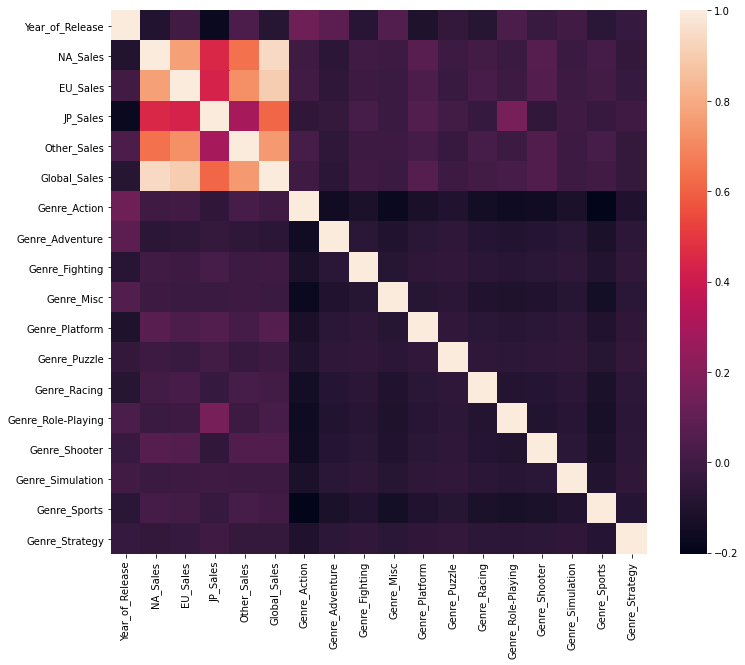

In [49]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre.corr());

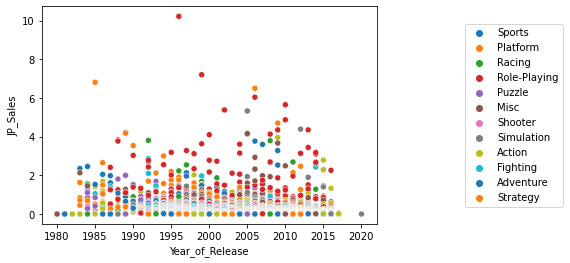

In [50]:
_ = sns.scatterplot(data=sales_no_scores, x='Year_of_Release', y='JP_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

It appears the Role-Playing Genre may have a slight corrilation with sales in Japan. However id does not appear that this corrilation continues for North America, Europe, Other, or Global. However Platformers do appear slightly corrilated with all of the sales. We see this confirmed in the scatterplot of Japan Sales. 

The scatterplot of Global Sales was a bit harder to read, so I restricted to games after 2000 so to get a better understanding, and we see Shooter, Role-Playing, and Action being more popular in recent years.

Note: We can create these scatter plots to specificaly the desired area if we would rather look at regional sales instead of Global, as we did for Japan.

In [51]:
dummy_sales_publisher = pd.get_dummies(sales_no_scores, columns=['Publisher'])
dummy_sales_publisher.shape

(16416, 589)

This appears to be extremely large. In addition the publisher is not necessiarily something under a game designer's control, so we will leave it out for now.

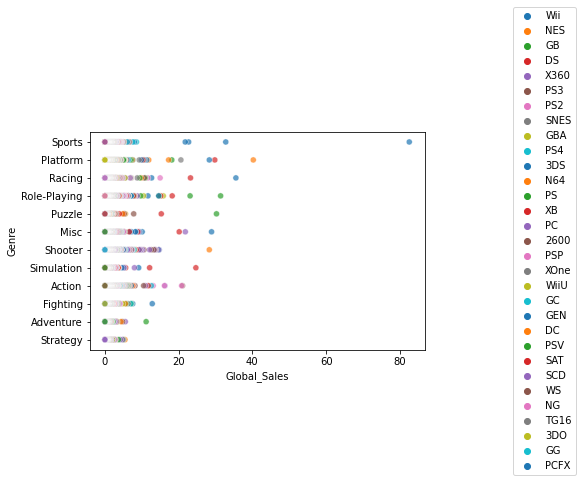

In [52]:
_ = sns.scatterplot(data=sales_no_scores, x='Global_Sales', y='Genre', hue='Platform', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [53]:
dummy_sales_genre_platform = pd.get_dummies(sales_no_scores, columns=['Genre','Platform'])
dummy_sales_genre_platform.shape

(16416, 51)

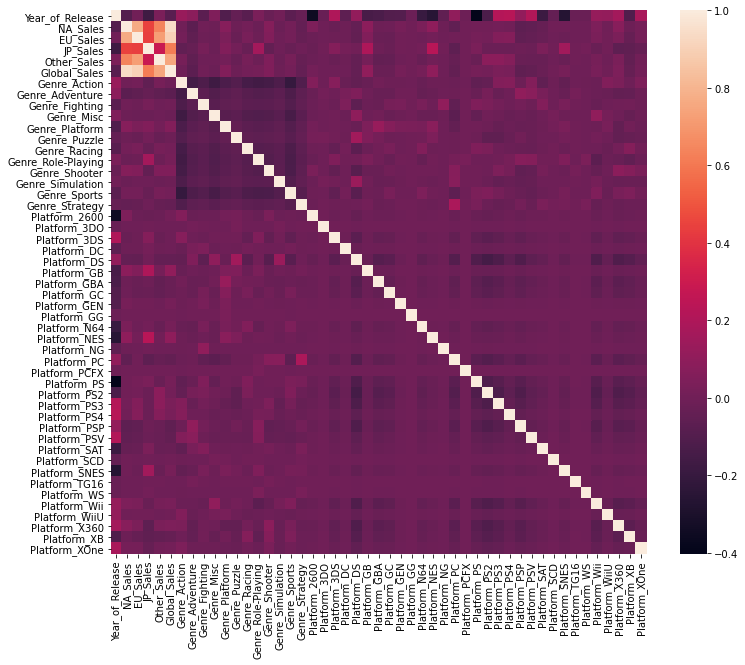

In [54]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

For the sake of looking at modern platforms and making the heat map more legible I will be dropping the columns relating to DS, GameBoy, GameBoy Advanced, Nintendo 64, Nintendo Entertainment System, PlayStation, PlayStation 2, PlayStation 3, Super Nintendo Entertainment System, Wii, and XBox

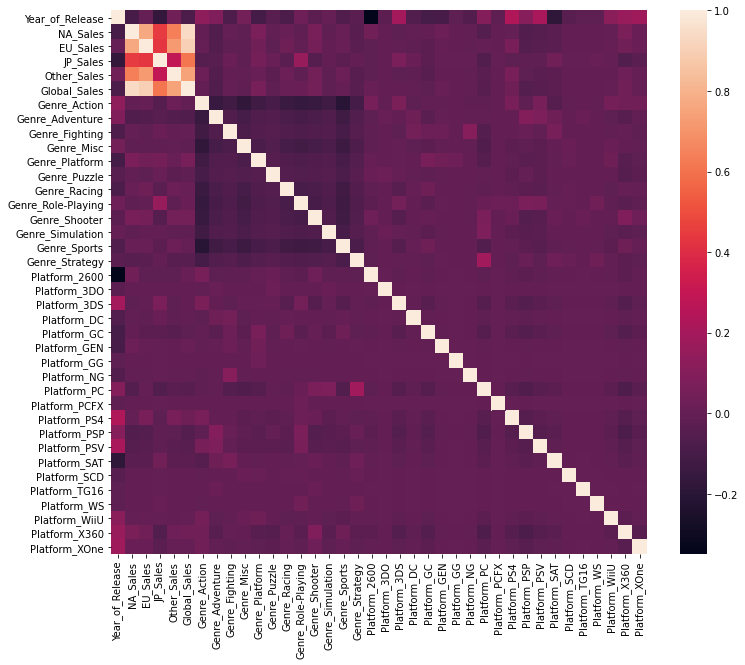

In [55]:
dummy_sales_genre_platform.drop(columns=['Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_N64', 'Platform_NES', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_SNES', 'Platform_Wii', 'Platform_XB'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Though I'm not familiar with 2600 and SAT, their negative corrilation with Year_of_Release, so we'll drop them as well.

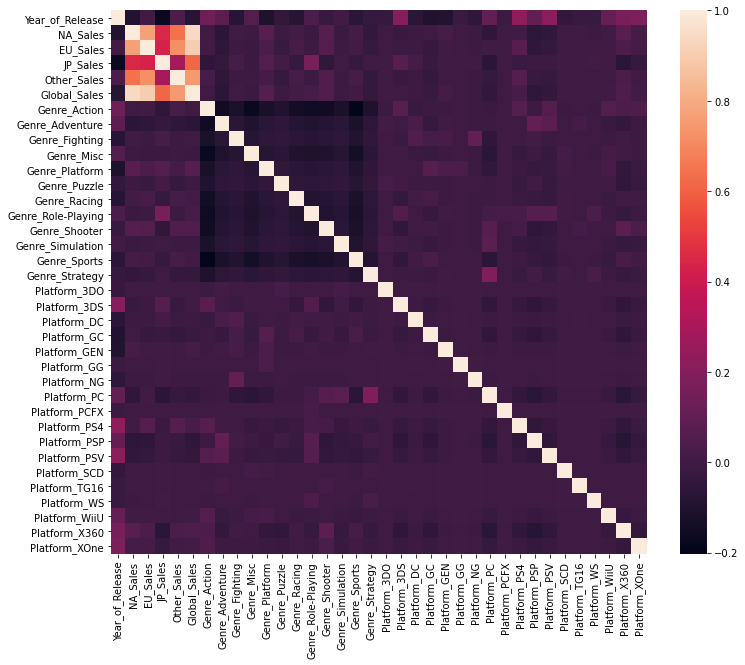

In [56]:
dummy_sales_genre_platform.drop(columns=['Platform_2600', 'Platform_SAT'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

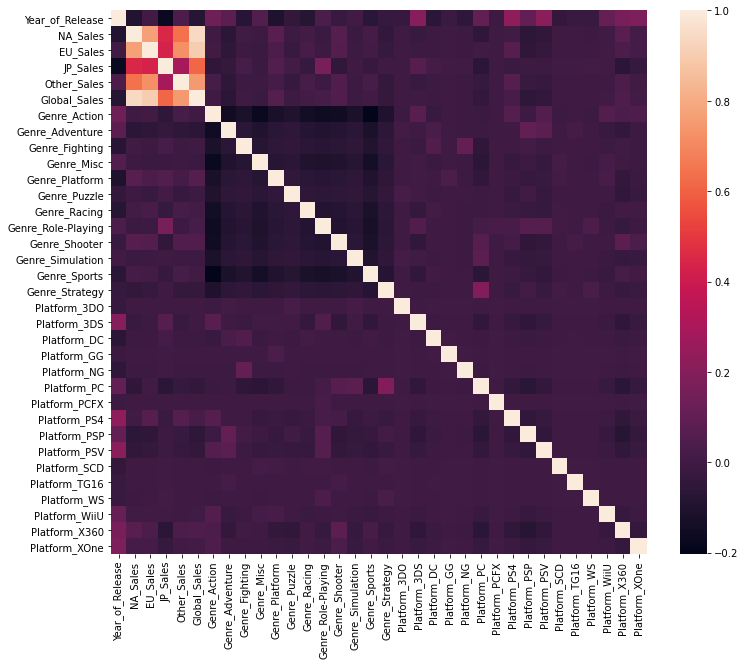

In [57]:
dummy_sales_genre_platform.drop(columns=['Platform_GC', 'Platform_GEN'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_genre_platform.corr());

Some interesting notes from this data set is that Strategy games seem to be slightly corrilated with PC gamers, Shooters are slightly corrilated between XBox 360 and PC, Adventure is corrilated between the PSP and the PS Vita, and others. These slight corrilations all make sense, though they don't appear strongly corrilated with sales. Next I want to do a similar analysis of the Data with the Rows that have user and critic scores

In [58]:
vg_sales_2016_w_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [59]:
sales_and_scores = vg_sales_2016_w_scores.dropna(axis=0)
sales_and_scores.shape

(6825, 16)

In [60]:
sales_and_scores.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

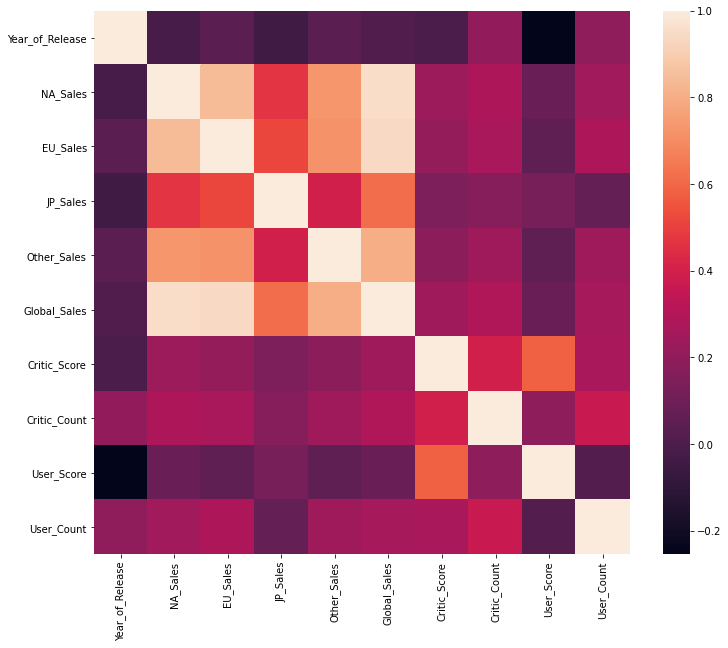

In [61]:
plt.subplots(figsize=(12,10))
sns.heatmap(sales_and_scores.corr());

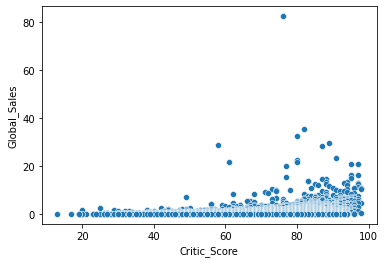

In [62]:
_ = sns.scatterplot(data=sales_and_scores, x='Critic_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

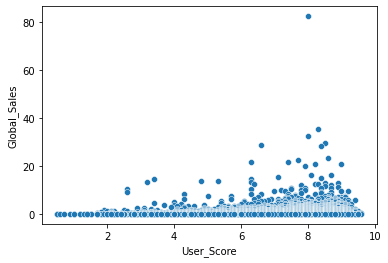

In [63]:
_ = sns.scatterplot(data=sales_and_scores, x='User_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

The first thing of note is that the Critic_Score and User_Score are strongly corrilated, which is good, we don't want those not corrilated. We will also note that critic score is slightly corrilated with North American and European sales. Now we will do the same corrilation analysis as we did with the last set, but jump straight to the platform and genre dummies.

Looking at the scatter plots we do see Critic and User Scores are corilated with Global Sales.

In [65]:
dummy_sales_scores = pd.get_dummies(sales_and_scores, columns=['Genre','Platform', 'Rating'])
dummy_sales_scores.shape

(6825, 49)

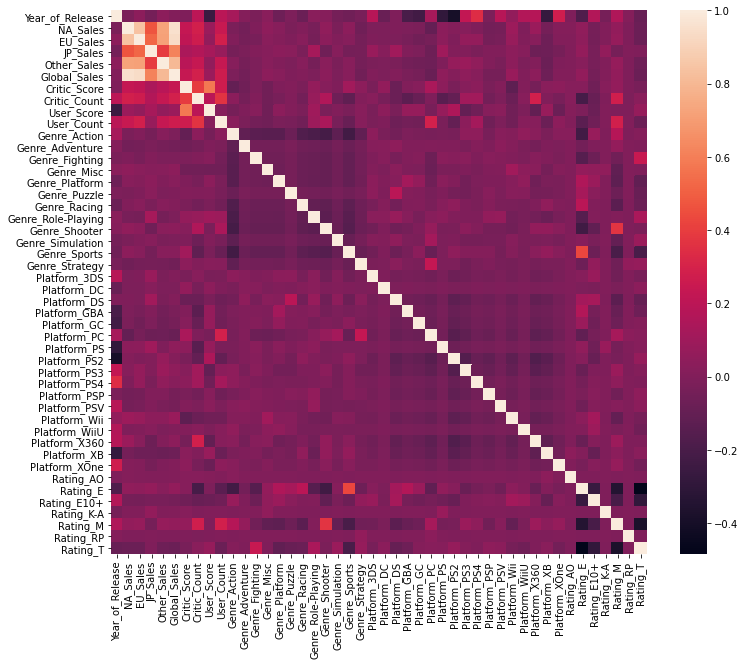

In [66]:
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's drop the outdated platforms as we did before, something to note: 'Platform_GB',  'Platform_N64',  'Platform_NES',  'Platform_SNES',  'Platform_GEN',  'Platform_2600', and 'Platform_SAT' aren't in this set. This makes sense as these are older game systems, and previously I had hypothesized that the missing values in the Scores was corrilated with the year of release, and this more or less confirms that.

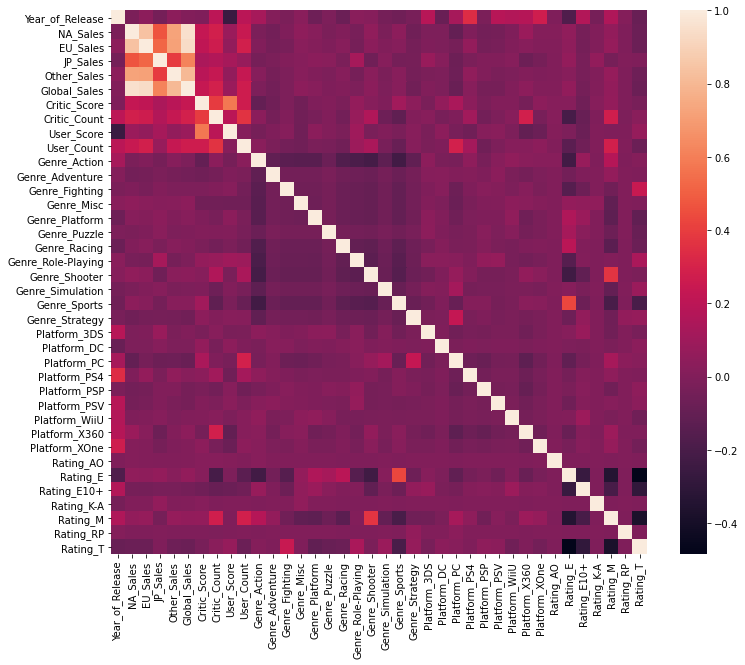

In [67]:
dummy_sales_scores.drop(columns=['Platform_DS', 'Platform_GBA', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB', 'Platform_GC'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

Let's also drop sales as we've already looked at the corrilation of sales already

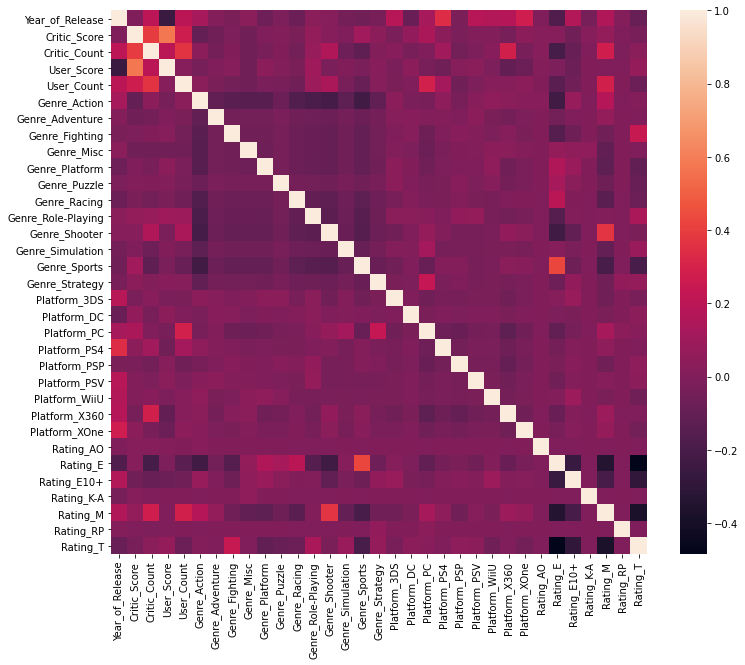

In [68]:
dummy_sales_scores.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_sales_scores.corr());

There does not appear to be a strong corrilation between scores and specific genre's or platforms. There are very slight corrilations between Critic_Score and the Sports Genre, Critic_Score and PC games, and User_Score and Role-Playing games. For now we'll leave this and look at if we can determine a cut off for popularity of a game with either the score or the sales.

In [69]:
sales_and_scores.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

<AxesSubplot:>

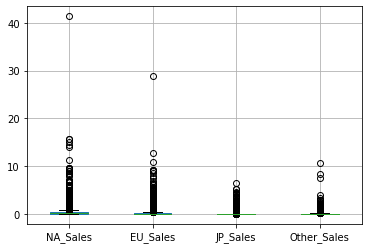

In [70]:
sales_and_scores.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [71]:
sales_and_scores.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


<AxesSubplot:>

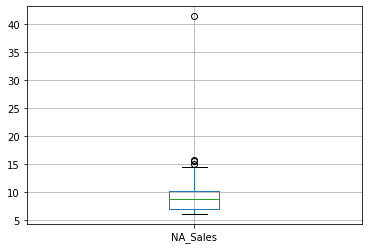

In [72]:

sales_and_scores[sales_and_scores['NA_Sales']>6].boxplot(column=['NA_Sales'])


In [73]:
sales_and_scores[sales_and_scores['NA_Sales']>6].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2007.857143,10.481786,6.155714,1.581786,2.203571,20.422500,87.142857,68.678571,7.453571,1741.678571
std,3.450328,6.734106,5.419915,1.848150,2.262230,14.306068,10.487079,19.071121,1.596404,1864.826376
min,2001.000000,6.060000,0.400000,0.040000,0.080000,8.490000,58.000000,29.000000,2.600000,52.000000
25%,2006.000000,6.955000,3.005000,0.102500,1.097500,12.660000,81.500000,55.500000,6.900000,403.750000
50%,2008.000000,8.720000,4.700000,0.440000,1.365000,15.565000,90.000000,73.000000,8.000000,1336.000000
75%,2010.000000,10.102500,8.145000,3.017500,2.390000,22.827500,95.000000,82.250000,8.425000,2366.500000
max,2013.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,100.000000,9.000000,8713.000000


<AxesSubplot:>

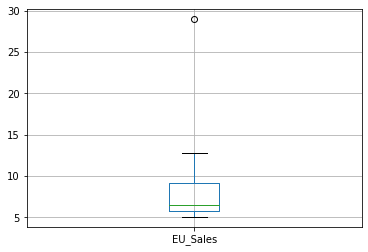

In [74]:

sales_and_scores[sales_and_scores['EU_Sales']>5].boxplot(column=['EU_Sales'])


In [75]:
sales_and_scores[sales_and_scores['EU_Sales']>5].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2008.565217,8.629565,8.197391,2.168696,2.213913,21.207826,85.347826,53.913043,7.282609,1114.000000
std,4.143188,8.640825,4.968095,2.040803,1.623562,15.836671,9.053421,15.418151,1.487418,1454.308239
min,2001.000000,0.080000,5.010000,0.000000,0.000000,6.290000,58.000000,21.000000,3.200000,19.000000
25%,2005.500000,3.695000,5.730000,0.255000,1.345000,12.965000,80.000000,41.000000,6.850000,253.000000
50%,2009.000000,7.020000,6.420000,1.870000,1.970000,16.270000,86.000000,57.000000,7.900000,464.000000
75%,2012.000000,10.495000,9.115000,3.780000,2.630000,25.765000,92.000000,64.500000,8.300000,909.000000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,82.530000,97.000000,80.000000,8.700000,5234.000000


<AxesSubplot:>

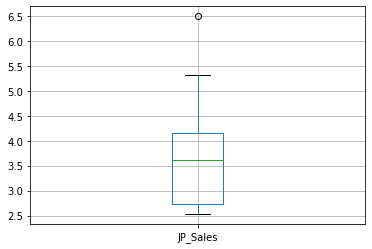

In [76]:

sales_and_scores[sales_and_scores['JP_Sales']>2.5].boxplot(column=['JP_Sales'])

In [77]:
sales_and_scores[sales_and_scores['JP_Sales']>2.5].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2005.920000,7.334000,5.756000,3.685600,1.535200,18.310000,84.760000,54.240000,8.344000,451.440000
std,4.367684,8.673522,6.082171,1.028101,1.766591,16.521357,7.949214,19.875194,0.614465,409.959559
min,1997.000000,0.470000,0.480000,2.530000,0.110000,3.890000,58.000000,16.000000,6.600000,19.000000
25%,2005.000000,2.280000,1.720000,2.730000,0.340000,7.860000,80.000000,41.000000,8.000000,146.000000
50%,2006.000000,4.020000,3.870000,3.610000,0.960000,12.660000,86.000000,58.000000,8.600000,322.000000
75%,2009.000000,9.710000,8.490000,4.160000,2.150000,23.210000,90.000000,70.000000,8.700000,632.000000
max,2014.000000,41.360000,28.960000,6.500000,8.450000,82.530000,96.000000,81.000000,9.200000,1662.000000


<AxesSubplot:>

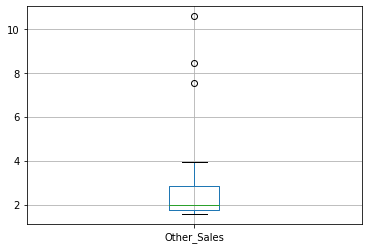

In [78]:

sales_and_scores[sales_and_scores['Other_Sales']>1.5].boxplot(column=['Other_Sales'])

In [79]:
sales_and_scores[sales_and_scores['Other_Sales']>1.5].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2007.741935,7.490000,5.587097,1.628387,2.807742,17.512581,84.838710,53.354839,7.487097,951.903226
std,2.874807,7.952665,5.746815,1.779854,2.127414,15.385731,10.139352,22.145802,1.260355,1245.477160
min,2002.000000,0.050000,0.000000,0.000000,1.570000,2.280000,58.000000,8.000000,3.200000,20.000000
25%,2006.000000,2.610000,0.235000,0.380000,1.755000,7.925000,81.000000,40.000000,6.600000,137.500000
50%,2007.000000,4.990000,5.010000,0.650000,1.970000,13.320000,88.000000,63.000000,7.700000,464.000000
75%,2009.500000,9.570000,8.260000,3.105000,2.860000,22.255000,91.500000,67.500000,8.350000,1033.000000
max,2014.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,82.000000,9.300000,5234.000000


<AxesSubplot:>

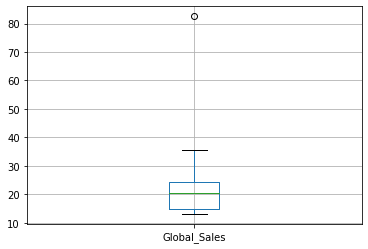

In [80]:

sales_and_scores[sales_and_scores['Global_Sales']>13].boxplot(column=['Global_Sales'])

In [81]:
sales_and_scores[sales_and_scores['Global_Sales']>13].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2007.666667,10.730833,7.427917,2.107083,2.600000,22.864583,84.875000,60.250000,7.208333,1478.833333
std,3.607560,7.376666,5.340367,2.015498,2.281058,14.346820,10.418681,18.983402,1.633858,2094.785299
min,2001.000000,3.430000,0.400000,0.060000,1.120000,13.100000,58.000000,21.000000,3.200000,19.000000
25%,2005.000000,7.012500,4.795000,0.285000,1.315000,14.700000,80.000000,48.750000,6.300000,180.500000
50%,2008.500000,9.025000,5.730000,1.425000,1.840000,20.480000,87.000000,60.000000,7.950000,629.000000
75%,2010.250000,11.950000,9.102500,3.775000,2.850000,24.487500,94.250000,73.000000,8.400000,1755.000000
max,2013.000000,41.360000,28.960000,6.500000,10.570000,82.530000,97.000000,100.000000,9.000000,8713.000000


<AxesSubplot:>

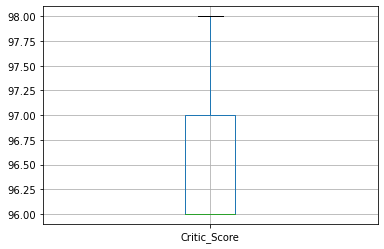

In [82]:
sales_and_scores[sales_and_scores['Critic_Score']>95].boxplot(column=['Critic_Score'])

In [83]:
sales_and_scores[sales_and_scores['Critic_Score']>95].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2005.757576,3.159697,1.980606,0.367879,0.589697,6.096667,96.575758,54.424242,8.533333,2040.848485
std,5.285773,2.295457,2.049347,0.552979,0.796910,4.982003,0.708445,27.282126,0.695821,1832.376055
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.140000,96.000000,14.000000,6.000000,47.000000
25%,2001.000000,1.650000,0.530000,0.030000,0.070000,2.370000,96.000000,34.000000,8.200000,747.000000
50%,2007.000000,2.710000,1.300000,0.100000,0.280000,4.680000,96.000000,56.000000,8.700000,1495.000000
75%,2010.000000,4.030000,2.790000,0.440000,0.810000,8.790000,97.000000,80.000000,8.900000,3143.000000
max,2015.000000,9.660000,9.090000,2.540000,3.960000,21.040000,98.000000,105.000000,9.400000,8665.000000


<AxesSubplot:>

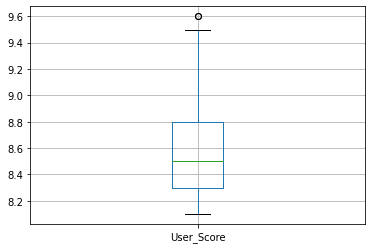

In [84]:

sales_and_scores[sales_and_scores['User_Score']>8].boxplot(column=['User_Score'])

In [85]:
sales_and_scores[sales_and_scores['User_Score']>8].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,2005.757647,0.495586,0.273774,0.118155,0.098838,0.986381,78.306824,32.569412,8.548518,237.196706
std,4.067127,0.985893,0.668044,0.417238,0.355663,2.087696,9.839100,20.006484,0.325897,738.942115
min,1992.000000,0.000000,0.000000,0.000000,0.000000,0.010000,27.000000,4.000000,8.100000,4.000000
25%,2003.000000,0.070000,0.020000,0.000000,0.010000,0.140000,73.000000,17.000000,8.300000,15.000000
50%,2005.000000,0.190000,0.080000,0.000000,0.030000,0.390000,79.000000,28.000000,8.500000,37.000000
75%,2008.000000,0.510000,0.250000,0.050000,0.080000,1.030000,85.000000,44.000000,8.800000,126.000000
max,2016.000000,15.680000,12.760000,6.500000,10.570000,35.520000,98.000000,105.000000,9.600000,10665.000000


So as you're reading this the above has the "greater than symbol" instead of the "less than", and you are welcome to switch the symbols so you can visualize what is being said now. The sales has many outliers and with the 75th percentile being significantly lower that the maximum value. However the Critic and User Scores had much better spreads. For the sake of curiosity I've swapped the </> symbols to see if there is anything of interest.

The cutoff values is set to 3 standard deviations above the mean, for each of the sales we are left with less than 100 games. We could argue that these are the most "popular" games. So I want to analyse if there is any corrilations among these games.

In [86]:
filtered = (vg_sales_2016_w_scores['NA_Sales']>6) | (vg_sales_2016_w_scores['EU_Sales'] > 5) | (vg_sales_2016_w_scores['JP_Sales'] > 2.5) | (vg_sales_2016_w_scores['Other_Sales'] > 1.5) | (vg_sales_2016_w_scores['Global_Sales'] > 13)
most_pop_games = vg_sales_2016_w_scores[filtered]
most_pop_games.dropna(inplace=True)
most_pop_games.shape

<ipython-input-86-2ef6f23ebe62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_pop_games.dropna(inplace=True)


(64, 16)

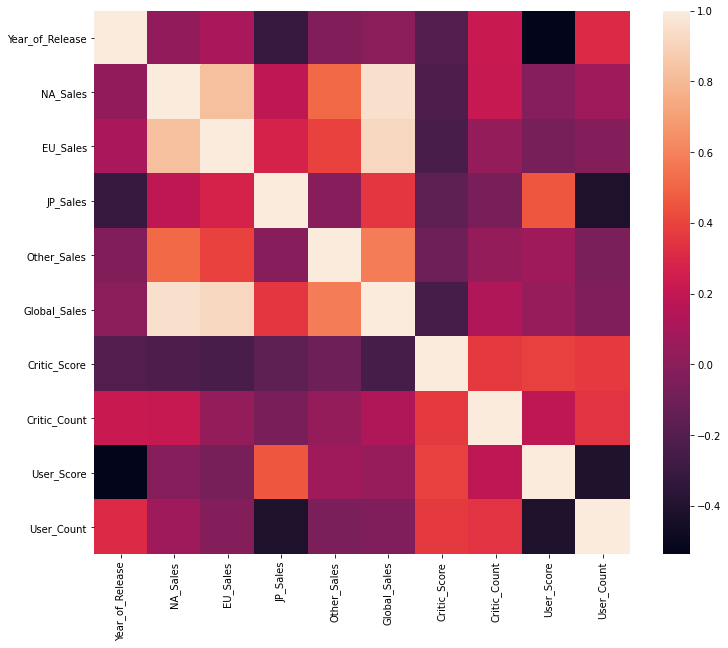

In [87]:
plt.subplots(figsize=(12,10))
sns.heatmap(most_pop_games.corr());

In our top video games we see a corrilation with User_Sores and sales in Japan, and we see that Critic and User Scores are still corrilated.

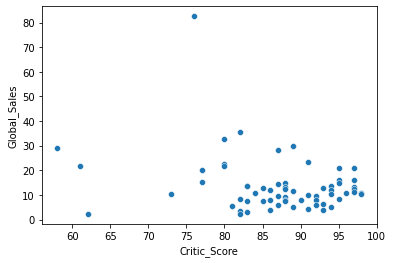

In [88]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

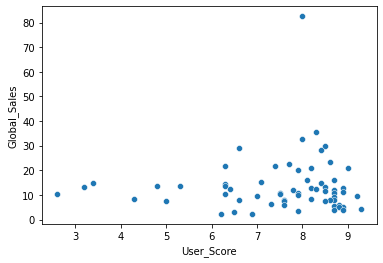

In [89]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales')
#_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [90]:
most_pop_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

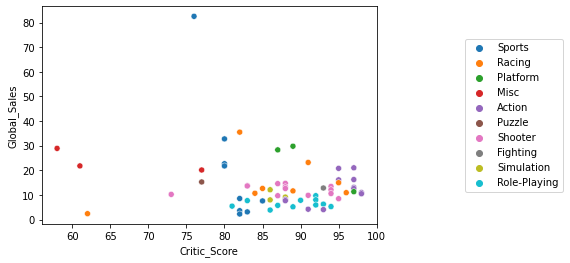

In [91]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

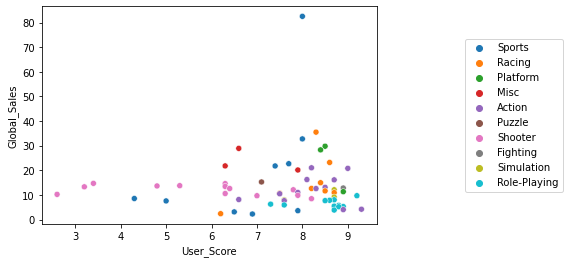

In [92]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='Genre', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking at our most popular games the ones that stand out are Action, Role-Playing, Shooting, Racing, Platform and Sports.

Action (purple) - Both User and Critic Scores appear fairly high for these games. Action is a solid choice for Genre

Role-Playing (light blue) - The User and Critic Scores appear to agree, though slightly lower sales than Action, still a solid option

Shooting (Pink) - It looks as if Critics like this genre more than users, sales are slightly higher than RP games, but lower than the potential of the Action games

Racing (Orange)- User and Critics seem to agree on the scores, they are less popular than Action (as far as scores), but have a higher potential for sales. We could hypothesise that this is because Racing games tend to have more co-op options, thus the need for players to have friends who play the game so they can play together.

Sports (Dark Blue)- Just like Shooting, Critics like these games more than users, and a suprisingly high sales similar to Racing. Do these games tend to have co-op options?

Platform (Green) - There doesn't seem to be many of these in the popular games, however those that are here are scored high and have a decent number of sales. This sounds like a High Risk/High Reward genre.

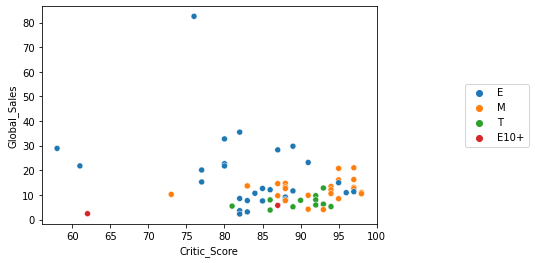

In [93]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='Rating')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

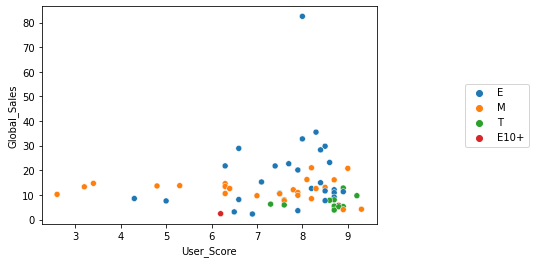

In [94]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='Rating')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Looking at the Ratings, it appears that making a game with a rating of Everyone or Teen is mroe popular amongs Users and Critics, with Everyone having a higher sales potentions, likely because the rating allows them to reach a younger audience. 

It appears that having a Mature rating has higher sales than Teen ratings, however it has the risk of lower user and critic scores.

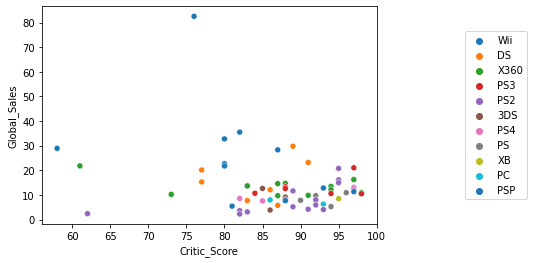

In [95]:
_ = sns.scatterplot(data=most_pop_games, x='Critic_Score', y='Global_Sales', hue='Platform', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

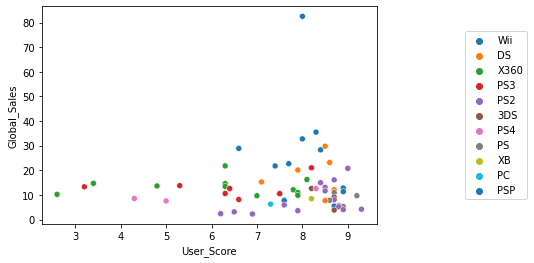

In [96]:
_ = sns.scatterplot(data=most_pop_games, x='User_Score', y='Global_Sales', hue='Platform', palette='tab10')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

We can conclude fairly quickly that the outlier game must be Wii Sports, which does have co-op options, and appealing to all ages for its interactive aspects allowing the user to "work out" while gaming.

It doesn't appear as if the critics have a prefrence in Platform, where as it looks like the Useres like the PSP, PS2, and 3DS and appear to dislike the XBox 360 and PS3.

In [97]:
dummy_popular = pd.get_dummies(most_pop_games, columns=['Genre','Platform', 'Rating'])
dummy_popular.shape

(64, 38)

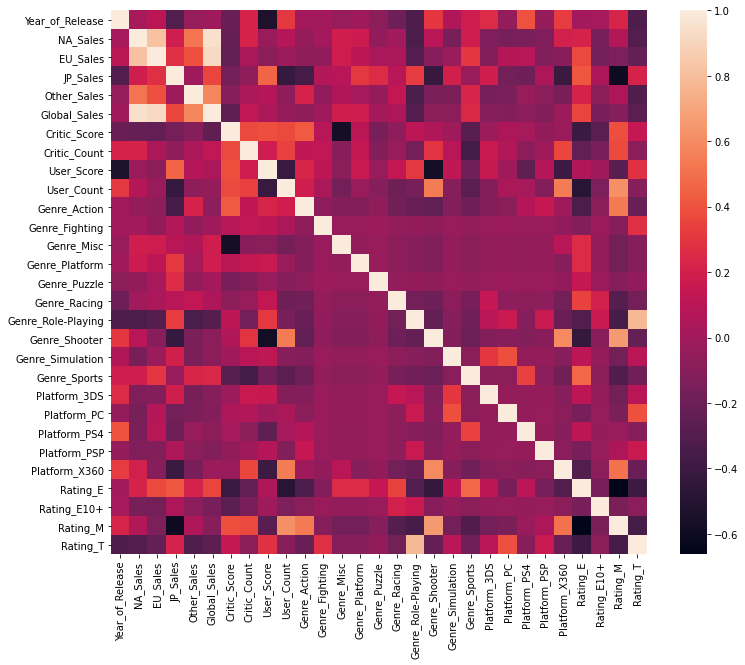

In [98]:
dummy_popular.drop(columns=['Platform_DS', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_Wii', 'Platform_XB'], inplace=True)
plt.subplots(figsize=(12,10))
sns.heatmap(dummy_popular.corr());

In [99]:
corr_matrix = dummy_popular.corr()
print(corr_matrix["Critic_Score"].sort_values(ascending=False))

Critic_Score          1.000000
Genre_Action          0.424218
Rating_M              0.389578
User_Score            0.384414
Critic_Count          0.368617
User_Count            0.366469
Rating_T              0.149591
Genre_Role-Playing    0.105427
Genre_Platform        0.103872
Genre_Fighting        0.088866
Genre_Shooter         0.061618
Platform_PC           0.052204
Platform_PS4          0.025044
Genre_Simulation     -0.009990
Platform_3DS         -0.018749
Platform_X360        -0.022159
Platform_PSP         -0.054199
Genre_Racing         -0.069274
Other_Sales          -0.102490
Genre_Puzzle         -0.149976
JP_Sales             -0.162387
Year_of_Release      -0.209856
NA_Sales             -0.223756
EU_Sales             -0.239715
Global_Sales         -0.250727
Rating_E10+          -0.267003
Genre_Sports         -0.284497
Rating_E             -0.402105
Genre_Misc           -0.570543
Name: Critic_Score, dtype: float64


In [100]:
print(corr_matrix["User_Score"].sort_values(ascending=False))

User_Score            1.000000
JP_Sales              0.458556
Critic_Score          0.384414
Genre_Role-Playing    0.306413
Rating_T              0.284179
Genre_Action          0.222971
Critic_Count          0.188522
Genre_Platform        0.159980
Platform_3DS          0.150059
Genre_Racing          0.133160
Genre_Simulation      0.120295
Genre_Fighting        0.116250
Platform_PSP          0.075329
Other_Sales           0.074546
Rating_E              0.062102
Global_Sales          0.045296
Rating_E10+          -0.003013
Platform_PC          -0.009039
NA_Sales             -0.019747
Genre_Puzzle         -0.035932
EU_Sales             -0.072331
Genre_Misc           -0.088051
Genre_Sports         -0.181726
Platform_PS4         -0.246791
Rating_M             -0.283725
Platform_X360        -0.399518
User_Count           -0.412193
Year_of_Release      -0.536551
Genre_Shooter        -0.581831
Name: User_Score, dtype: float64


In [101]:
print(corr_matrix["Global_Sales"].sort_values(ascending=False))

Global_Sales          1.000000
NA_Sales              0.952110
EU_Sales              0.920080
Other_Sales           0.580649
JP_Sales              0.355718
Rating_E              0.351453
Genre_Sports          0.241996
Genre_Misc            0.192400
Genre_Platform        0.183258
Critic_Count          0.124717
Genre_Racing          0.050609
User_Score            0.045296
Genre_Puzzle          0.017187
Year_of_Release      -0.003039
Genre_Fighting       -0.009884
Platform_X360        -0.012967
User_Count           -0.044190
Genre_Action         -0.067320
Genre_Shooter        -0.072547
Genre_Simulation     -0.077174
Platform_PS4         -0.080610
Rating_M             -0.098785
Platform_3DS         -0.100449
Platform_PC          -0.103720
Platform_PSP         -0.112620
Rating_E10+          -0.151842
Critic_Score         -0.250727
Rating_T             -0.263270
Genre_Role-Playing   -0.289967
Name: Global_Sales, dtype: float64


In [102]:
most_pop_games['Year_of_Release'].describe()

count      64.000000
mean     2007.500000
std         4.201285
min      1997.000000
25%      2005.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: Year_of_Release, dtype: float64

Looking at our "most popular" games we see some more corralations. The most interesting to note, while still not highly corralted are: Critic and Action, Critic and Shooter, User and Action, User and Platform, User and Fighting, User and Racing, User and Roleplaying, 

According to History.com the "Modern Age of Gaming" started around 2005, let's see if cutting off at 2000 will effect any of our correlations.

<AxesSubplot:>

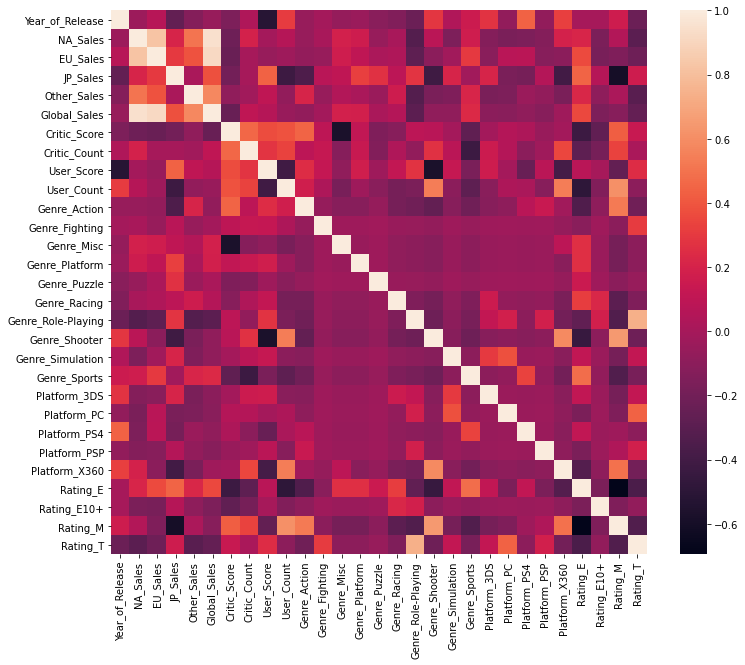

In [103]:
modern_most_pop = dummy_popular[dummy_popular['Year_of_Release']>=2000]
modern_corr = modern_most_pop.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(modern_corr)

In [104]:
print(modern_corr["User_Score"].sort_values(ascending=False))

User_Score            1.000000
JP_Sales              0.439393
Critic_Score          0.367755
Critic_Count          0.284138
Genre_Role-Playing    0.273577
Genre_Action          0.250080
Rating_T              0.248858
Genre_Platform        0.173205
Platform_3DS          0.163070
Genre_Simulation      0.132666
Genre_Fighting        0.124207
Genre_Racing          0.119486
Other_Sales           0.104693
Platform_PSP          0.084837
Rating_E              0.075847
Global_Sales          0.062513
Rating_E10+           0.004842
NA_Sales              0.000465
Platform_PC          -0.001311
Genre_Puzzle         -0.031123
EU_Sales             -0.056951
Genre_Misc           -0.080164
Genre_Sports         -0.168269
Platform_PS4         -0.242320
Rating_M             -0.259208
Platform_X360        -0.389544
User_Count           -0.408693
Year_of_Release      -0.519857
Genre_Shooter        -0.575006
Name: User_Score, dtype: float64


This appears to be much of the same information as we had without cutting off by years, we will leave this data set for now, and work on the next one.

# V. Tagged Steam Data

In [105]:
tagged_data = pd.read_csv("./csv_files/steam_2019_tags_merged.csv")
tagged_data.columns

Index(['Unnamed: 0', 'appid', 'name', 'release_date', 'english', 'developer',
       'publisher', 'platforms', 'required_age', 'categories',
       ...
       'warhammer_40k', 'web_publishing', 'werewolves', 'western', 'word_game',
       'world_war_i', 'world_war_ii', 'wrestling', 'zombies', 'e_sports'],
      dtype='object', length=390)

In [106]:
tagged_data.isna().sum()

Unnamed: 0      0
appid           0
name            0
release_date    0
english         0
               ..
world_war_i     0
world_war_ii    0
wrestling       0
zombies         0
e_sports        0
Length: 390, dtype: int64

It may be easier to work with the unmerged data first with how large this data set is, since one of the things I want to do is to look at the tag data and convert it to a True/False (1/0) data instead of the number that there are.

In [107]:
steam_data_2019_tags = pd.read_csv("./csv_files/steamspy_tag_data.csv", index_col='appid')
steam_data_2019_tags.head()

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,144,564,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
20,0,71,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
steam_data_2019_tags.apply(pd.DataFrame.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
appid,,,,,,,,
10,371.0,42.045822,239.563444,0.0,0.0,0.0,0.0,2681.0
20,371.0,4.407008,23.335018,0.0,0.0,0.0,0.0,208.0
30,371.0,2.663073,15.334195,0.0,0.0,0.0,0.0,138.0
40,371.0,1.035040,7.704429,0.0,0.0,0.0,0.0,85.0
50,371.0,4.792453,25.470015,0.0,0.0,0.0,0.0,235.0
...,...,...,...,...,...,...,...,...
1065230,371.0,0.202156,1.980880,0.0,0.0,0.0,0.0,21.0
1065570,371.0,0.431267,2.485089,0.0,0.0,0.0,0.0,21.0
1065650,371.0,0.169811,1.883285,0.0,0.0,0.0,0.0,21.0


To understand what we are about to do, you need to understand what we are looking at. We have 371 tags for the games, and value with each tag is how many users have tagged the game with that particular tag. The problem is, some tags are incorrect. In the previous notebook if you look at the heads of the data we see appid = 30 "Day of Defeat" has 5 tags for WW1 and 122 tags for WW2, a quick internet search tells us this is actually a WW2 game not WW1. My goal will be to create a threshold value that will allow us to decide if a tag is "correct" or not. We can change this value to meet our own prefrence, for now I will choose the threshold to be 75% of the max value.

In [109]:
tags_t = steam_data_2019_tags.transpose()

tags_t

appid,10,20,30,40,50,60,70,80,130,220,...,1063560,1064060,1064580,1064890,1065160,1065230,1065570,1065650,1066700,1069460
1980s,144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990s,564,71,0,0,77,0,376,0,46,0,...,0,0,0,0,0,0,0,0,0,0
2.5d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d,0,0,0,0,0,0,0,0,0,0,...,0,0,11,0,0,0,0,0,0,0
2d_fighter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world_war_i,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
world_war_ii,0,0,122,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrestling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombies,0,0,0,0,0,0,0,0,63,607,...,0,0,0,0,0,0,0,0,0,0


In [110]:
for col in tags_t.columns:
    maximum = tags_t[col].max()
    tags_t.loc[tags_t[col]<(maximum*.75), col] = 0
    tags_t.loc[tags_t[col]>=(maximum *.75), col] = 1
    
tags_t

appid,10,20,30,40,50,60,70,80,130,220,...,1063560,1064060,1064580,1064890,1065160,1065230,1065570,1065650,1066700,1069460
1980s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d_fighter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world_war_i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
world_war_ii,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrestling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zombies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
tags_tf = tags_t.transpose()
tags_tf.head()

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
steam_data_2019 = pd.read_csv("./csv_files/steam.csv",index_col='appid')
steam_data_2019.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [113]:
steam_data_2019['rating_percent_pos'] = steam_data_2019['positive_ratings']/(steam_data_2019['negative_ratings'] + steam_data_2019['positive_ratings'])
steam_data_2019.dtypes

name                   object
release_date           object
english                 int64
developer              object
publisher              object
platforms              object
required_age            int64
categories             object
genres                 object
steamspy_tags          object
achievements            int64
positive_ratings        int64
negative_ratings        int64
average_playtime        int64
median_playtime         int64
owners                 object
price                 float64
rating_percent_pos    float64
dtype: object

In [114]:
steam_data_2019['release_date'] = pd.to_datetime(steam_data_2019['release_date'])
steam_data_2019.dtypes

name                          object
release_date          datetime64[ns]
english                        int64
developer                     object
publisher                     object
platforms                     object
required_age                   int64
categories                    object
genres                        object
steamspy_tags                 object
achievements                   int64
positive_ratings               int64
negative_ratings               int64
average_playtime               int64
median_playtime                int64
owners                        object
price                        float64
rating_percent_pos           float64
dtype: object

In [115]:
steam_data_2019['price'].describe()

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

In [116]:
steam_data_2019[steam_data_2019['price']>=50]

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
appid,,,,,,,,,,,,,,,,,,
100980,3DCoat 4.8,2012-10-02,1,Pilgway,Pilgway,windows,0,Steam Cloud,Animation & Modeling,Animation & Modeling,0,75,5,0,0,0-20000,95.99,0.937500
220700,RPG Maker VX Ace,2012-12-10,1,KADOKAWA,Degica,windows,0,Steam Trading Cards;Steam Workshop,Design & Illustration;Web Publishing,Game Development;RPG;RPGMaker,0,3372,210,405,465,500000-1000000,52.99,0.941374
244830,Wing IDE 5,2014-04-30,1,Wingware,Wingware,windows;mac;linux,0,Single-player,Utilities,Utilities;Programming,0,16,2,0,0,0-20000,60.99,0.888889
248170,Clickteam Fusion 2.5,2013-12-05,1,Clickteam,Clickteam,windows,0,Single-player;Multi-player;MMO;Co-op;Shared/Sp...,Animation & Modeling;Education;Utilities;Web P...,Game Development;Animation & Modeling;Web Publ...,0,616,71,0,0,100000-200000,69.99,0.896652
251810,Leadwerks Game Engine,2014-01-06,1,Leadwerks Software,Leadwerks Software,windows,0,Single-player;Steam Achievements;Steam Worksho...,Animation & Modeling;Design & Illustration;Edu...,Animation & Modeling;Game Development;Design &...,3,211,77,0,0,20000-50000,78.99,0.732639
253670,Aartform Curvy 3D 3.0,2013-11-12,1,Aartform,Aartform,windows,0,Single-player,Animation & Modeling,Animation & Modeling,0,33,12,0,0,0-20000,75.99,0.733333
269950,X-Plane 11,2017-03-30,1,Laminar Research,Laminar Research,windows;mac;linux,0,Single-player;Local Multi-Player;Partial Contr...,Simulation,Simulation;Flight;Realistic,0,2033,443,44169,44169,100000-200000,54.99,0.821082
321410,Command: Modern Air / Naval Operations WOTY,2014-09-26,1,WarfareSims,Slitherine Ltd.,windows,0,Single-player;Steam Workshop;Includes level ed...,Simulation;Strategy,Simulation;Strategy;Naval,0,424,78,0,0,20000-50000,60.99,0.844622
325180,AppGameKit: Easy Game Development,2014-11-21,1,The Game Creators,The Game Creators,windows;mac;linux,0,Steam Workshop,Animation & Modeling;Design & Illustration;Edu...,Game Development;Software Training;Utilities,0,225,27,1,1,50000-100000,60.99,0.892857


In [117]:
steam_data_2019 = steam_data_2019[steam_data_2019['price']<50]

Looking at this data we see that 10 of the 11 games that cost over $100 are extremely unpopular with 0 average and mean play time, and relatively low numbers of reviews. As for the 11th game, "GameMaker Studio 2 Web" This is not a game it is a program created to help people to create and make a new game. With this information I am choosing to drop these outliers as they are unpopular or just not even a game.

When lowering this threshold to $50 only 6 of 38 games have thier average and/or median playtime over 0 minutes, and 3 of those 6 are programs to make a game, and not themselves games.

So for now let's note the 3 outliers in this area but go ahead and utilize this $50 cut off. The outliers we are losing and will want to look at later are

$54.99 - Dead or Alive 6

$54.99 - Warriors Orochi 4

$54.99 - X-Plane 11

Something to note as we go into this we do not have sales information with this data set, so we plan on using the rating ratio to determine popularity.

In [118]:
sample = steam_data_2019.sample(frac=.1)

(array([885., 650., 551., 130., 158., 114.,  71.,  49.,   2.,  45.,   3.,
         14.,   7.,   7.,   0.,   8.,   2.,   3.,   1.,   4.]),
 array([ 0.    ,  2.4995,  4.999 ,  7.4985,  9.998 , 12.4975, 14.997 ,
        17.4965, 19.996 , 22.4955, 24.995 , 27.4945, 29.994 , 32.4935,
        34.993 , 37.4925, 39.992 , 42.4915, 44.991 , 47.4905, 49.99  ]),
 <BarContainer object of 20 artists>)

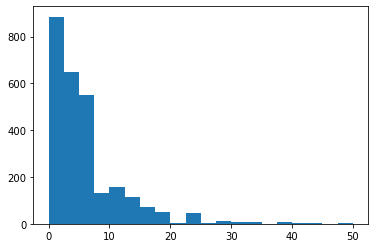

In [119]:
plt.hist(x=sample['price'], bins = 20)

In [120]:
sample_corr = sample.corr()
print(sample_corr["price"].sort_values(ascending=False))

price                 1.000000
negative_ratings      0.261913
positive_ratings      0.178948
required_age          0.164779
median_playtime       0.090466
average_playtime      0.089894
rating_percent_pos    0.056464
english               0.030457
achievements         -0.011242
Name: price, dtype: float64


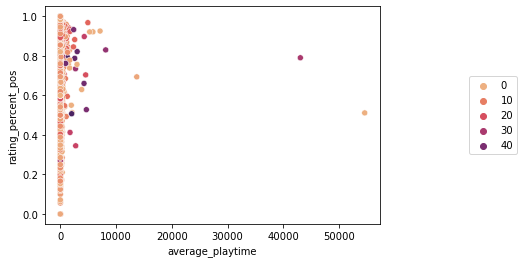

In [121]:
_ = sns.scatterplot(data=sample, x='average_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

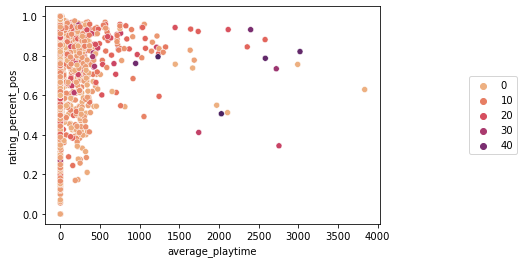

In [122]:
_ = sns.scatterplot(data=sample[sample['average_playtime']<4000], x='average_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

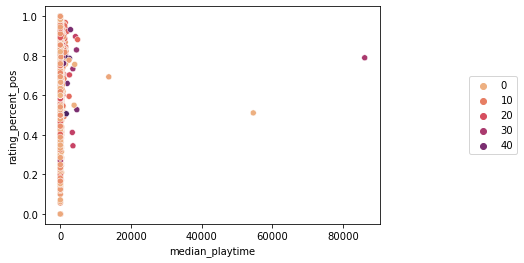

In [123]:
_ = sns.scatterplot(data=sample, x='median_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

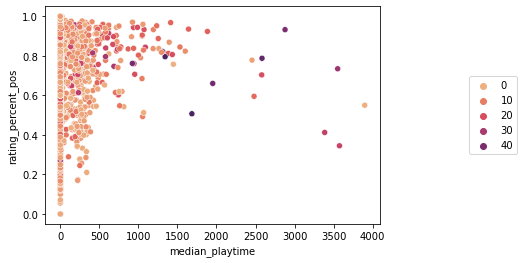

In [124]:
_ = sns.scatterplot(data=sample[sample['median_playtime']<4000], x='median_playtime', y='rating_percent_pos', hue='price', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

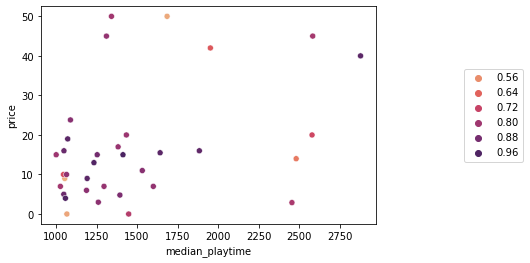

In [125]:
playtime = (sample['median_playtime'] > 1000) & (sample['median_playtime'] < 3000)
_ = sns.scatterplot(data=sample[playtime], x='median_playtime', y='price', hue='rating_percent_pos', palette='flare')
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

It is good to see that the average and median playtime data seems to agree that above 1000 minutes (16.67 hours) appears to have more postive reviews than negative. This in combination with our earlier discoveries we can conclude that it would be good to set our play time between 16 and 50 hours.

We also see that prices, that most games cost less than 20 dollars. In our play time range of 16-50 hours we see that we can charge between 20 and 40 dollars for a longer game without loosing popularity (percentage of positive reviews), however the higher prices come with lower reviews if the game is shorter

In [126]:
tags_tf.sum().sort_values(ascending=False).head(10)

indie           17937
action          11029
casual           9719
adventure        9212
strategy         5168
simulation       4925
rpg              4197
early_access     3014
free_to_play     2294
sports           1712
dtype: int64

Looking at the top 10 tags these are mostly genres (action, adventure, strategy, simulation, rpg, sports) where the others are production:

indie - these are games made by individuals or smaller developement teams, not a large game puchlisher. These games are very popular right now.

casual - in a world of increasing competitiveness, "casual" means the game has non competitive features. A player doesn't have to fight/compete against other players and there isn't an emphasis on "grinding". "Casual" could also mean the game is more accessible to "lower level" gamers, the gamers don't have to exert a lot of effort in order to complete the game.

early_access - this is early releases for game testing, this tag is used to acknowledge that there may still be bugs in the game and the expectation of further updates as we finish production of the game. This is good for beta testing.

free_to_play - it is free to play the base version of the game, but other parts of the game may require micro transactions to access

In [127]:
tags_tf = tags_tf.reset_index()
tags_tf

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,1065230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29018,1065570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29019,1065650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29020,1066700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
top_10 = ['appid', 'indie', 'action', 'casual', 'adventure', 'strategy', 'simulation', 'rpg', 'early_access', 'free_to_play', 'sports']
top10tags = tags_tf.filter(items= top_10)
print(top10tags.head())

top_10_cat = (top10tags.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
top_10_cat

   appid  indie  action  casual  adventure  strategy  simulation  rpg  \
0     10      0       1       0          0         0           0    0   
1     20      0       1       0          0         0           0    0   
2     30      0       0       0          0         0           0    0   
3     40      0       1       0          0         0           0    0   
4     50      0       1       0          0         0           0    0   

   early_access  free_to_play  sports  
0             0             0       0  
1             0             0       0  
2             0             0       0  
3             0             0       0  
4             0             0       0  


,appid,tag
26,1002,indie
32,1500,indie
35,1530,indie
61,2400,indie
62,2420,indie
...,...,...
290119,1051500,sports
290131,1052870,sports
290145,1053780,sports
290154,1054930,sports


In [129]:
top_10_tags_merged = pd.merge(
    top_10_cat,
    steam_data_2019,
    on='appid',
    sort=True
)
top_10_tags_merged.dropna(inplace=True)

top_10_tags_merged

,appid,tag,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
0,10,action,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,0.973888
1,20,action,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0.839787
2,40,action,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0.826623
3,50,action,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0.947996
4,60,action,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99,0.801278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61709,1066700,casual,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,1.000000
61710,1066700,adventure,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,1.000000
61711,1069460,indie,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19,1.000000
61712,1069460,casual,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19,1.000000


(617, 20)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

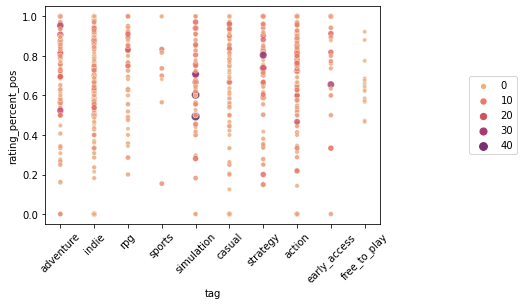

In [130]:
top_10_sample = top_10_tags_merged.sample(frac=.01)
print(top_10_sample.shape)
_ = sns.scatterplot(data=top_10_sample, x='tag', y='rating_percent_pos', hue='price', size='price', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Noting in this scatterplot of the top 10 tags, we see that indie games have a more volitile rating, but also on the cheaper side of games. It also makes sense that we see the free_to_play and early_access games on the cheaper side as well.

We can see higher prices with action and strategy.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

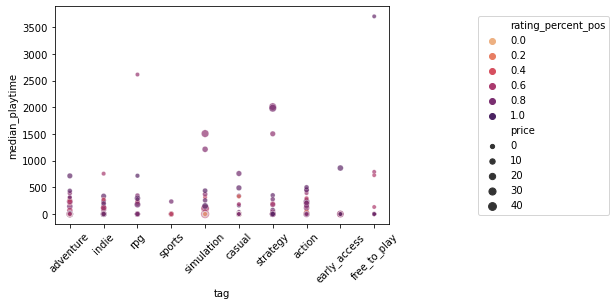

In [131]:
_ = sns.scatterplot(data=top_10_sample[top_10_sample['median_playtime']<4000], x='tag', y='median_playtime', hue='rating_percent_pos', palette='flare', size='price', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

We see with this plot that games that have longer playtimes have both highter ratings and higher prices

In [132]:
tags_tf.columns
tags_cat = (tags_tf.melt(var_name='tag')
       .query('value== 1')
       .drop('value',1))
tags_cat.index.name = 'appid'
tags_cat.head()

,tag
appid,
29324,1980s
29366,1980s
29367,1980s
29498,1980s
29499,1980s


In [133]:
tags = tags_cat['tag'].unique().tolist()
tags

['1980s',
 '1990s',
 '2.5d',
 '2d',
 '2d_fighter',
 '360_video',
 '3d',
 '3d_platformer',
 '3d_vision',
 '4_player_local',
 '4x',
 '6dof',
 'atv',
 'abstract',
 'action',
 'action_rpg',
 'action_adventure',
 'addictive',
 'adventure',
 'agriculture',
 'aliens',
 'alternate_history',
 'america',
 'animation_&_modeling',
 'anime',
 'arcade',
 'arena_shooter',
 'artificial_intelligence',
 'assassin',
 'asynchronous_multiplayer',
 'atmospheric',
 'audio_production',
 'bmx',
 'base_building',
 'baseball',
 'based_on_a_novel',
 'basketball',
 'batman',
 'battle_royale',
 'beat_em_up',
 'beautiful',
 'benchmark',
 'bikes',
 'blood',
 'board_game',
 'bowling',
 'building',
 'bullet_hell',
 'bullet_time',
 'crpg',
 'capitalism',
 'card_game',
 'cartoon',
 'cartoony',
 'casual',
 'cats',
 'character_action_game',
 'character_customization',
 'chess',
 'choices_matter',
 'choose_your_own_adventure',
 'cinematic',
 'city_builder',
 'class_based',
 'classic',
 'clicker',
 'co_op',
 'co_op_campaign'

In [134]:
animation = ['2.5d', '2d', '2d_fighter', '3d', '3d_platformer', '3d_vision']

genre = ['action', 'action_rpg', 'action_adventure', 'adventure', 'bullet_hell', 'board_game', 'card_game', 
         'choose_your_own_adventure', 'classic', 'comedy', 'crime', 'cyberpunk', 'dark_comedy', 'dark_fantasy'
        'dark_humor', 'dating_sim', 'documentary', 'drama', 'dungeon_crawler', 'education', 
         'fantasy', 'fighting', 'gambling', 'god_game', 'hacking', 'horror', 'hunting', 'indie', 'crpg', 'jrpg',
        'level_editor', 'mmorpg', 'moba', 'metroidvania', 'mystery', 'otome', 'platformer', 
         'psychological_horror', 'puzzle', 'puzzle_platformer', 'real_time', 'rogue_like', 'rogue_lite',
        'romance', 'runner', 'sandbox', 'shooter', 'simulation', 'strategy', 'strategy_rpg', 'survival', 
         'thriller', 'tower_defense', 'walking_simulator', 'wargame', 'zombies', 'rpg']

sci_fi = ['aliens', 'alternate_history', 'conspiracy', 'illuminati', 'mechs', 'sci_fi', 'science', 'star_wars', 'steam_punk']

fantasy = ['dark_fantasy', 'demons', 'dragons', 'fantasy', 'magic', 'supernatural', 'vampire']

cartoon = ['cartoon', 'cartoony']

art_style = ['anime', 'beautiful', 'blood', 'cartoon', 'cartoony', 'cinematic', 'colorful',
            'comic_book', 'cute', 'dark', 'fmv', 'futuristic', 'gore', 'gothic', 'hand_drawn', 'minimalist', 'modern',
            'old_school', 'pixel_graphics', 'psychedelic', 'realistic', 'retro', 'stylized', 'surreal',
            'visual_novel', 'voxel']

multiplayer = ['asynchronus_multiplayer', 'co_op', 'co_op_campaign', 'local_co_op', 'local_multiplayer', 'mmorpg', 'moba',
              'massively_multiplayer', 'multiplayer', 'online_co_op']

playstyle = ['arcade', 'arena_shooter', 'base_building', 'battle_royale', 'beat_em_up', 'benchmark', 'board_game', 
             'card_game', 'character_action_game', 'choices_matter', 'choose_your_own_adventure', 'city_builder', 
             'class_based', 'controller', 'conversation', 'crafting', 'destruction', 'character_customization', 'diplomacy', 
             'economy', 'episodic', 'exploration', 'fishing', 'god_game', 'grand_strategy', 'hack_and_slash', 'hex_grid', 
             'heist', 'hidden_object', 'hunting', 'intentionally_awkward_controls', 'interactive_fiction', 
             'inventory_management', 'investigation', 'level_editor', 'logic', 'loot', 'mmorpg', 'moba', 'minigames', 'mining',
            'mouse_only', 'on_rails_shooter', 'open_world', 'perma_death', 'physics', 'platformer', 'point_&_click',
            'puzzle', 'pve', 'pvp', 'quick_time_events', 'real_time_tactics', 'real_time_with_pause', 'resource_management', 
            'score_attack', 'shoot_em_up', 'single_player', 'sniper', 'sokoban', 'spectacle_fighter', 'stealth', 'strategy', 
            'survival', 'swordplay', 'tactical', 'team_based', 'text_based', 'time_attack', 'time_management', 
             'time_manipulation', 'tower_defense', 'trading', 'turn_based', 'turn_based_combat', 'turn_based_strategy', 
             'turn_based_tactics', 'twin_stick_shooter', 'voice_control', 'walking_simulator', 'party_based_rpg', '6dof', 
             'bullet_time', 'split_screen']

sports = ['baseball', 'basketball', 'bowling', 'clicker', 'competitive', 'dungeon_crawler', 'football', 'golf', 'hockey', 
          'mini_golf', 'skateboarding', 'skating', 'skiing', 'snowboarding', 'soccer', 'sports', 'tennis', 'wrestling']

rpg = ['crpg', 'jrpg', 'mmorpg', 'party_based_rpg', 'rpg', 'strategy_rpg', 'tactical_rpg']

difficulty = ['casual', 'competitive', 'difficult', 'unforgiving']

feature = ['character_customization', 'female_protagonist', 'great_soundtrack', 'gun_customization', 'lore_rich', 'mod', 
           'moddable', 'multiple_endings', 'story_rich', 'tutorial', 'romance', '6dof', 'grid_based_movement', 'vr', 'vr_only',
          'bullet_time', 'split_screen', 'capitalism']

production = ['crowdfunded', 'early_access', 'free_to_play', 'indie', 'kickstarter']

pov = ['first_person', 'isometric', 'side_scroller', 'third_person', 'third_person_shooter', 'top_down', 'top_down_shooter']

mature_content = ['nsfw', 'mature', 'nudity', 'sexual_content']

setting = ['war', 'western', 'cold_war', 'world_war_i', 'world_war_ii', 'historical', 'dystopian_', 'dungeons_&_dragons',
          'post_apocalyptic', 'superhero', 'futuristic', 'alternate_history', 'star_wars', 'warhammer_40k', 'fantasy', 'cyberpunk']

atmosphere= ['comedy', 'romance', 'horror']

Above are lists that were manually made based on all the tags that are in the data set, some of these will not be used but could possibly be used if the company was interested in, such as the list of sports tags. If the company decided on making a sports game, we can then do a more indepth analysis of the topic to determine which sport to set our game around.

What will happen next is breaking down certain aesthetic aspects we might want to analyize for creating the game

$i.$ Animation

In [135]:
animation.append('appid')
animation_style = tags_tf.filter(items=animation)
print(animation_style.head())

animation_cat = (animation_style.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
animation_cat

   2.5d  2d  2d_fighter  3d  3d_platformer  3d_vision  appid
0     0   0           0   0              0          0     10
1     0   0           0   0              0          0     20
2     0   0           0   0              0          0     30
3     0   0           0   0              0          0     40
4     0   0           0   0              0          0     50


,appid,tag
302,10520,2.5d
344,12370,2.5d
345,12380,2.5d
476,18430,2.5d
477,18450,2.5d
...,...,...
173625,1026200,3d_vision
173647,1027230,3d_vision
173781,1034700,3d_vision
173826,1036970,3d_vision


In [136]:
animation_cat.tag = animation_cat.tag.str.replace(r'3d.*', '3d')
animation_cat.tag = animation_cat.tag.str.replace(r'2d.*', '2d')
animation_cat

<ipython-input-136-2fd2a4f7d636>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  animation_cat.tag = animation_cat.tag.str.replace(r'3d.*', '3d')
<ipython-input-136-2fd2a4f7d636>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  animation_cat.tag = animation_cat.tag.str.replace(r'2d.*', '2d')


,appid,tag
302,10520,2.5d
344,12370,2.5d
345,12380,2.5d
476,18430,2.5d
477,18450,2.5d
...,...,...
173625,1026200,3d
173647,1027230,3d
173781,1034700,3d
173826,1036970,3d


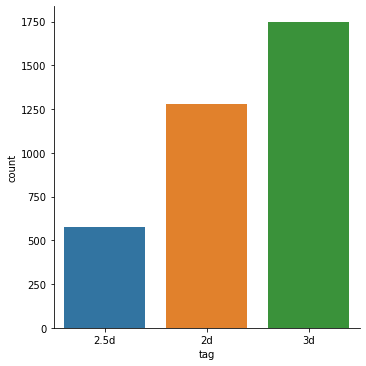

In [137]:
sns.catplot(data=animation_cat, x='tag', kind='count')

In [138]:
animation_tags_merged = pd.merge(
    
    animation_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

animation_sample = animation_tags_merged.sample(frac=1)
print(animation_sample.shape)


(154, 20)


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

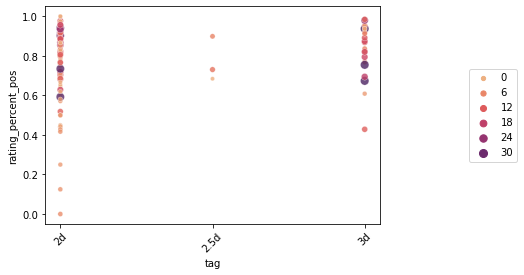

In [139]:
_ = sns.scatterplot(data=animation_sample, x='tag', y='rating_percent_pos', hue='price', size='price', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Here we can see that 3d has highter rates of postive reviews than 2d as well as having higher prices

$ii.$ Genre

In [140]:
genre.append('appid')
genre_tag = tags_tf.filter(items=genre)

genre_cat = (genre_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))
genre_cat

,appid,tag
0,10,action
1,20,action
3,40,action
4,50,action
5,60,action
...,...,...
1596169,1057690,rpg
1596174,1058430,rpg
1596176,1058660,rpg
1596195,1062240,rpg


In [141]:
genre_cat['tag'].value_counts().sort_values(ascending=False).head(10)

indie         17937
action        11029
adventure      9212
strategy       5168
simulation     4925
rpg            4197
puzzle          885
horror          875
platformer      839
survival        832
Name: tag, dtype: int64

Our list of genres is too large, so we're going to pick the top 10 to use in analysis:

indie, action, adventure, strategy, simulation, puzzle, horror, platformer, survival, education

In [142]:
top_10_genre = ['indie', 'action', 'adventure', 'strategy', 'simulation', 'rpg', 'puzzle', 'horror', 'platformer', 'survival', 'education']
genre_cat = genre_cat[genre_cat['tag'].isin(top_10_genre)]
genre_cat

,appid,tag
0,10,action
1,20,action
3,40,action
4,50,action
5,60,action
...,...,...
1596169,1057690,rpg
1596174,1058430,rpg
1596176,1058660,rpg
1596195,1062240,rpg


In [143]:
genre_tags_merged = pd.merge(
    
    genre_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

genre_sample = genre_tags_merged.sample(frac=.05)
print(genre_sample.shape)

(2445, 20)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

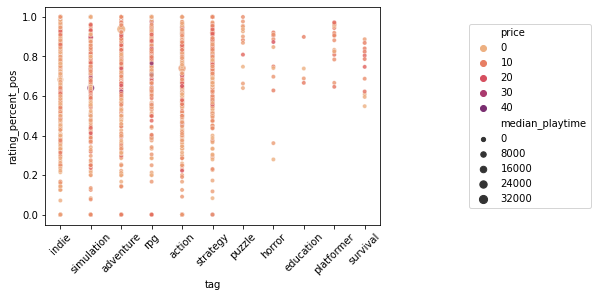

In [144]:
_ = sns.scatterplot(data=genre_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

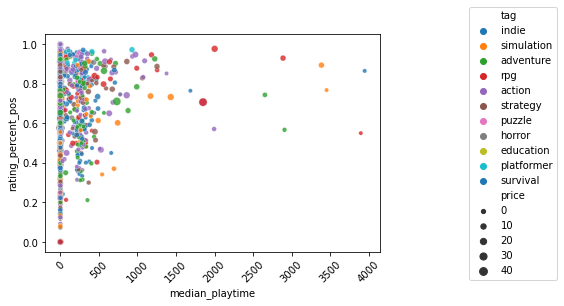

In [145]:
_ = sns.scatterplot(data=genre_sample[genre_sample['median_playtime']<4000], x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.8)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

We can determine form this that horror, survival, education, puzzle, and platformers are less volitile in their reviews, and players may be more willing to pay more for something in the horror and survival genres. 

We also see survival having longer play times, this makes sense as they wouldn't be as interesting if they are shorter games, the purpose of the game is to survive for as long as possible.

$iii.$ Art Style

In [146]:
art_style.append('appid')
art_tag = tags_tf.filter(items=art_style)

art_cat = (art_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

art_cat['tag'].value_counts().sort_values(ascending=False).head(10)



gore              1378
anime              941
visual_novel       934
pixel_graphics     756
retro              640
colorful           619
cute               617
realistic          591
fmv                590
stylized           590
Name: tag, dtype: int64

In [147]:
top_10_art = ['gore', 'anime', 'visual_novel', 'pixel_graphics', 'retro', 'colorful', 'cute', 'realistic', 'stylized', 'fmv']
art_cat = art_cat[art_cat['tag'].isin(top_10_art)]
art_tags_merged = pd.merge(
    
    art_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

art_sample = art_tags_merged.sample(frac=.05)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

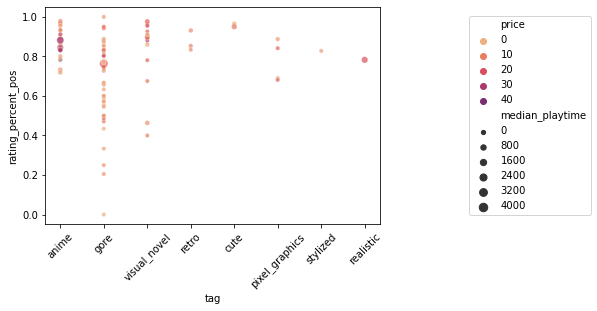

In [148]:
_ = sns.scatterplot(data=art_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

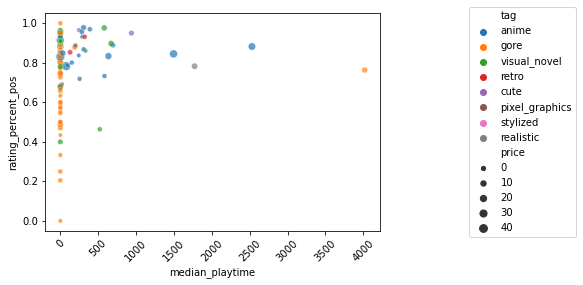

In [149]:
_ = sns.scatterplot(data=art_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

The 'gore' art style seems to have the most volitile ratings. We also see a higher price point for anime and realistic art styles, likely because of the level of production that goes into the game.

$iv.$ Features: Multiplayer and Feature lists

In [150]:
features = feature + multiplayer
features.append('appid')
features_tag = tags_tf.filter(items=features)

features_cat = (features_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

features_cat.loc[features_cat['tag'].isin(multiplayer), 'tag'] = 'multiplayer'
features_cat['tag'].value_counts()

multiplayer                6154
vr                          782
female_protagonist          723
great_soundtrack            712
story_rich                  697
character_customization     592
multiple_endings            581
split_screen                580
romance                     580
bullet_time                 578
grid_based_movement         578
lore_rich                   577
6dof                        577
moddable                    577
capitalism                  577
gun_customization           576
mod                         575
vr_only                     575
tutorial                    575
Name: tag, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

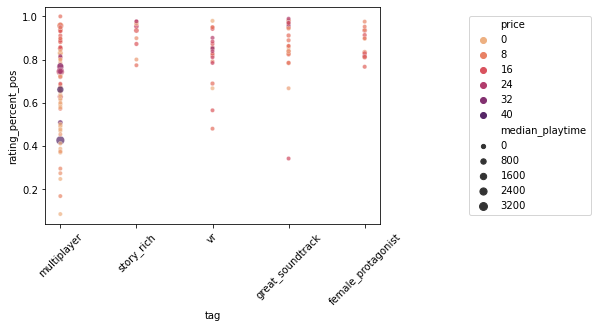

In [151]:
top_10_features = ['multiplayer', 'vr', 'female_protagonist', 'great_soundtrack', 'story_rich', 'character_customization', 
                   'multiple_endings', 'romance', 'split_screen', 'bullet_time']

features_cat = features_cat[features_cat['tag'].isin(top_10_features)]
features_tags_merged = pd.merge(
    
    features_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

features_sample = features_tags_merged[features_tags_merged['median_playtime'] < 4000].sample(frac=.1)

_ = sns.scatterplot(data=features_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

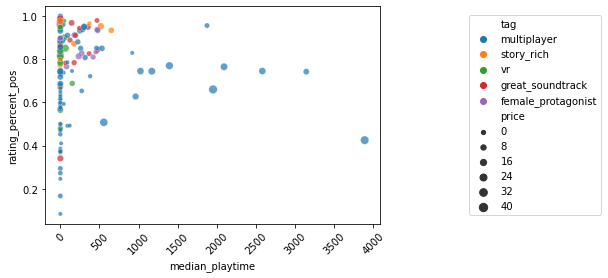

In [152]:
_ = sns.scatterplot(data=features_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

It looks as if games that are story rich and have a great soundtrack tend towards higher ratings. Multiplayer seems to be very volitile in ratings, but we could look deeper into the multiplayer category to see if there is a corrilation in multiplayer style and rating.

$v.$ Play Style

In [153]:
playstyle.append('appid')
playstyle_tag = tags_tf.filter(items=playstyle)

playstyle_cat = (playstyle_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))


playstyle_cat['tag'].value_counts().sort_values(ascending=False).head(10)

strategy         5168
puzzle            885
platformer        839
survival          832
open_world        796
point_&_click     724
tower_defense     681
shoot_em_up       674
card_game         653
hidden_object     653
Name: tag, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

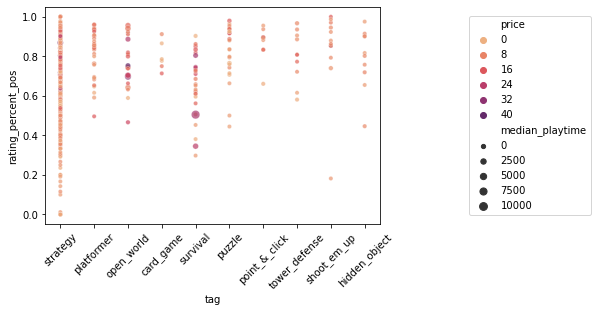

In [154]:
top_10_playstyles = ['strategy', 'puzzle', 'platformer', 'survival', 'open_world', 'point_&_click', 'tower_defense', 
                     'shoot_em_up', 'card_game', 'hidden_object']
playstyle_cat = playstyle_cat[playstyle_cat['tag'].isin(top_10_playstyles)]
playstyle_tags_merged = pd.merge(
    
    playstyle_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

playstyle_sample = playstyle_tags_merged.sample(frac=.1)
_ = sns.scatterplot(data=playstyle_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

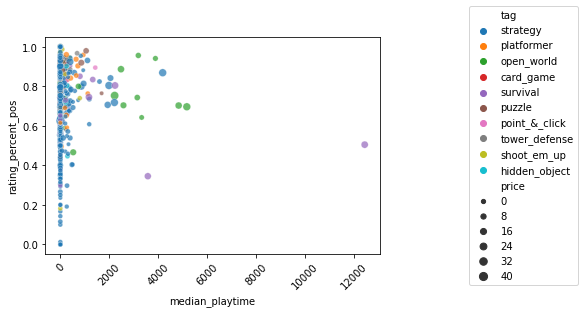

In [155]:
_ = sns.scatterplot(data=playstyle_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

The category that stands out in playstyle is the open world, with a generally high rating, longer playtimes, and higher price points. This could be because the player can freely explore the world that's been built, but this is also harder on graphics and game design as it requires more of the world to be built, thus costing more.

Strategy games seem to be fairly volitile with longer strategy games having higher favor.

$vi.$ Difficulty

In [156]:
difficulty.append('appid')

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

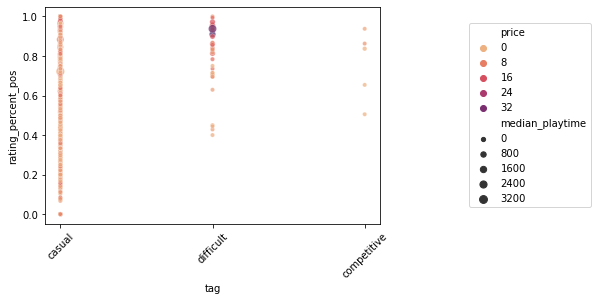

In [157]:

difficulty_tag = tags_tf.filter(items=difficulty)

difficulty_cat = (difficulty_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))


difficulty_tags_merged = pd.merge(
    
    difficulty_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

difficulty_sample = difficulty_tags_merged[difficulty_tags_merged['median_playtime'] < 4000].sample(frac=.5)

_ = sns.scatterplot(data=difficulty_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

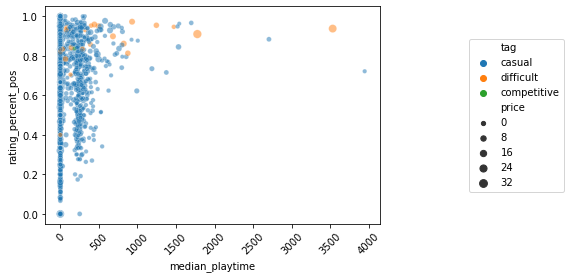

In [158]:
_ = sns.scatterplot(data=difficulty_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.5)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Ratings for Difficult game tend to be faily positive, have longer play times, and look like players are willing to pay more for them. It makes sense that the competitve games do not see large game times as it is difficult to coordinate multiple people to compete against eachother for long periods of time.

$vii.$ Point of View (PoV)

In [159]:
pov

['first_person',
 'isometric',
 'side_scroller',
 'third_person',
 'third_person_shooter',
 'top_down',
 'top_down_shooter']

In [160]:
pov.append('appid')

pov_tag = tags_tf.filter(items=pov)

pov_cat = (pov_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

pov_cat.tag = pov_cat.tag.str.replace(r'third_person.*', 'third_person')
pov_cat.tag = pov_cat.tag.str.replace(r'top_down.*', 'top_down')
pov_cat['tag'].value_counts()

<ipython-input-160-0c69df79d6fa>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  pov_cat.tag = pov_cat.tag.str.replace(r'third_person.*', 'third_person')
<ipython-input-160-0c69df79d6fa>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  pov_cat.tag = pov_cat.tag.str.replace(r'top_down.*', 'top_down')


top_down         1179
third_person     1170
first_person      620
side_scroller     601
isometric         584
Name: tag, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

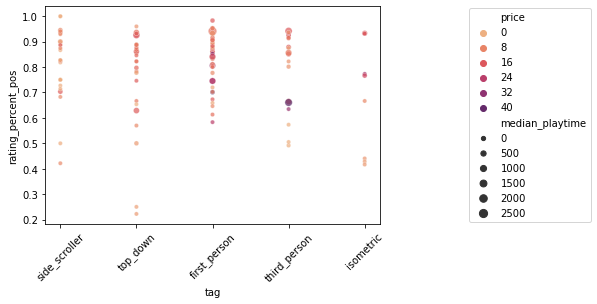

In [161]:
pov_tags_merged = pd.merge(
    
    pov_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

pov_sample = pov_tags_merged.sample(frac=1)
_ = sns.scatterplot(data=pov_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

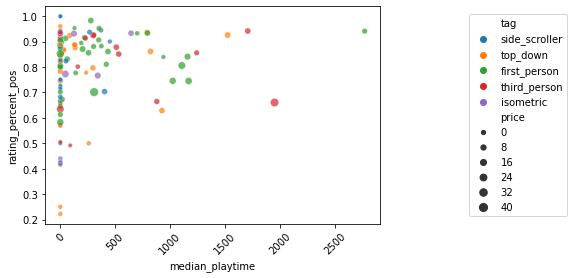

In [162]:
_ = sns.scatterplot(data=pov_sample, x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

It looks like isometric is not popular for longer games, and first or third person points of view have more popular ratings than top down.

$viii.$ Setting

In [163]:
setting.append('appid')

setting_tag = tags_tf.filter(items=setting)

setting_cat = (setting_tag.melt(id_vars='appid', var_name='tag')
       .query('value== 1')
       .drop('value',1))

setting_cat['tag'].value_counts().sort_values(ascending=False).head(10)

world_war_ii        631
cyberpunk           619
post_apocalyptic    613
warhammer_40k       602
fantasy             596
war                 595
western             593
star_wars           593
historical          588
futuristic          581
Name: tag, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

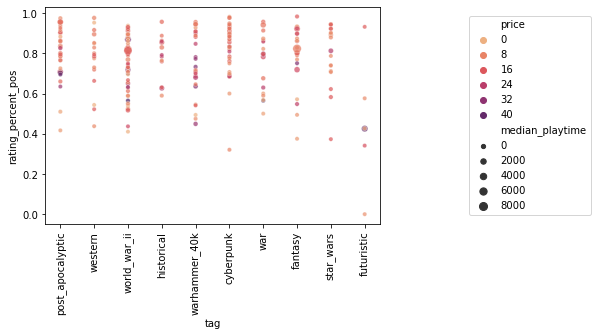

In [164]:
top_10_settings = ['world_war_ii', 'post_apocalyptic', 'warhammer_40k', 'war', 'star_wars', 'western', 'historical', 
                   'futuristic', 'cyberpunk', 'fantasy']

setting_cat = setting_cat[setting_cat['tag'].isin(top_10_settings)]
setting_tags_merged = pd.merge(
    
    setting_cat,
    steam_data_2019,
    on='appid',
    sort=True,
)

setting_sample =setting_tags_merged.sample(frac=1)
_ = sns.scatterplot(data=setting_sample, x='tag', y='rating_percent_pos', hue='price', size='median_playtime', palette='flare', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=90)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

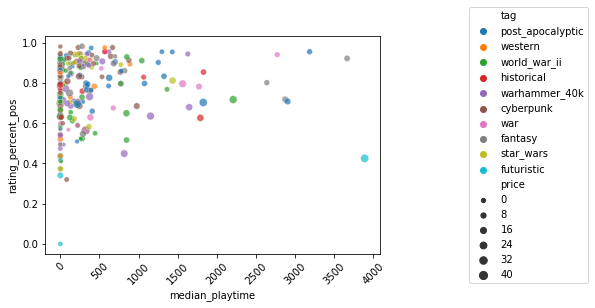

In [165]:
_ = sns.scatterplot(data=setting_sample[setting_sample['median_playtime'] < 4000], x='median_playtime', y='rating_percent_pos', hue='tag', size='price', palette='tab10', alpha=.7)
_.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=45)

Our most commmon settings are world_war_ii, cyberpunk, and post_apocalyptic.
We see high ratings for fantasy, cyberpunk, war, star_wars, and historical settings.
And low ratings on Futuristic.
And we see high playtimes for fantasy and world war 2. Then for under 4000 minutes we have postapocalyptic, warhammer_40k, and war settings added to our list of longer games with higher ratings.

## Conclusion:

The favored categories of each set are at the top of the notebook. Note in the subsections of part V, the lists were manually created so we can go through and edit them as we see fit, or even create new ones if we want a more in depth search of a certain category, such as multiplayer or sports.

There is a lot to work with from these data sets. I decided the last set was too large to work with all at once so decided to take the tags data and filter for what I wanted to look at each time and then merged the filtered data with the game data to create the tables. It was good to see a consistancy between all of the data sets, that longer games tended to have higher ratings. This trend tends to start around the 1000 minutes mark. I think we have enough information here for a game designer to have options to choose how they design a game from this point.